<h1 align="center">Machine Learning</h1>

<h2 align="center">Submitters:</h2>

<h2 align="center">Name: Almog Rabani, ID: [REDACTED]</h2>

<h2 align="center">Name: Yakir Hasid, ID: [REDACTE]</h2>

<h1><u>VIDEOS:</u></h1>

<h2><u>Q6-Q8</u></h2>

https://drive.google.com/file/d/1SQicta9PE2umtvcyeasVto4tlnKnS15i/view?usp=share_link

<h2><u>Q9</u></h2>

https://drive.google.com/file/d/14jMLrxqLHuKKnEjKTg8_StXYL378a_OV/view?usp=sharing

<h2><u>Q10</u></h2>

https://drive.google.com/file/d/1dtuP2wQNwkWOHpdLgPiTAk7QFtI3vjtN/view?usp=sharing

<h2><u>Q11</u></h2>

https://drive.google.com/file/d/1PttsSji5roMeNISl4hK-IZGFQdvdIFAa/view?usp=sharing

<h2><u>Q12</u></h2>

https://drive.google.com/file/d/1LyjjKS6EUQg8jyIRbowGd_f5n7_bEJQm/view?usp=sharing

<h1><u>FUNCTIONS:</u></h1>

<h1><u>PART A:</u></h1>

<h2><u>Q6</u></h2>

<h4>Converts the given Data Frame into Numpy Matrix</h4>

In [1]:
def convertDF2NP(dataFrame):
    # convert the dataframe into numpy array.
    Data = dataFrame.values

    np.random.seed(42)

    # shuffle the data
    Data = np.random.permutation(Data)

    # tag the classification
    Data[Data=='R'] = 0
    Data[Data=='M'] = 1

    # make data float
    Data = Data.astype(float);
    
    return Data;

<h4>Divides the Data into Train and Test</h4>

In [2]:
def setTrainTest(Data, NTrain):
    """    
    Input: Data vector - Representing the full data examples
           NTrain integer - Representing the number of examples to use for training           
    Output: DTrain vector - Representing the full train data examples
            DTest vector - Representing the full test data examples
            XTrain vector - Representing the train features examples
            YTrain vector - Representing the train classification examples
            XTest vector - Representing the test features examples
            YTest vector - Representing the test classification examples
    Description: Divides the full data into NTrain examples of data train,
                 While the remainder of the full data will be examples of data test.
                 Also creates matrixies of features and classifications for the train and test examples.
    """     
    
    # put NTrain of the first examples in data into the train dataset
    DTrain = Data[0:NTrain, :];
    
    # put the rest of the examples in data into the test dataset
    DTest = Data[NTrain:, :];

    # features of the train dataset are all the cols except the last
    XTrain = DTrain[:, :-1];
    
    # classification of the train dataset is the last col
    YTrain = DTrain[:, -1];

    # features of the train dataset are all the cols except the last
    XTest = DTest[:, :-1];
    
    # classification of the test dataset is the last col
    YTest = DTest[:, -1];
    
    return [DTrain, DTest, XTrain, YTrain, XTest, YTest];

<h4>Prints the Details of the Data</h4>

In [3]:
def printDataDetails(XTrain, XTest, YTrain, YTest):

    # rows of the train data set is the number of train examples
    nTrainEx = XTrain.shape[0];

    # rows of the test data set is the number of test examples
    nTestEx = XTest.shape[0];
    
    # rows of the full data set is the total number of examples
    nTotalEx = nTrainEx+nTestEx;    

    # cols of the data set (train or test) is the number of features
    nDataFet = XTrain.shape[1];

    # number of rock examples in the train set
    nRockTrain = sum(YTrain==0);

    # number of metal examples in the train set
    nMetalTrain = sum(YTrain==1);

    # number of rock examples in the test set
    nRockTest = sum(YTest==0);

    # number of metal examples in the test set
    nMetalTest = sum(YTest==1);

    # number of rock examples in the full data set
    nRockTotal = nRockTrain+nRockTest;

    # number of metal examples in the full data set
    nMetalTotal = nMetalTrain+nMetalTest;

    print('Number of Total Examples: ' + str(nTotalEx))
    print('Number of Train Examples: ' + str(nTrainEx))
    print('Number of Test Examples: ' + str(nTestEx))
    print('Number of features in the data: ' + str(nDataFet))
    print('Number of rock examples in the train data: ' + str(nRockTrain))
    print('Number of metal examples in the train data: ' + str(nMetalTrain))
    print('Number of rock examples in the test data: ' + str(nRockTest))
    print('Number of metal examples in the test data: ' + str(nMetalTest))
    print('Rock/Metal Ratio in full data: ' + str(nRockTotal/nMetalTotal))
    print('Rock/Metal Ratio in train data: ' + str(nRockTrain/nMetalTrain))
    print('Rock/Metal Ratio in test data: ' + str(nRockTest/nMetalTest))  

<h2><u>Q7</u></h2>

<h4>Implementation of KNN Algorithm</h4>

In [4]:
def KNN(classified, K, unclassified):
    """    
    Input: classified vector - Representing classified examples
           K integer - Representing the number of neighbors
           unclassified vector - Representing unclassified examples  
    Output: yClassified vector - Representing classification of the unclassified examples
    Description: Using KNN algorithm with K neighbors, classifies the unclassified examples
    """ 
    
    matIdxDist = np.full((K,2), [-1, float('inf')]);
    classification = [];
    
    #algorithm
    #1. for each unclassified
    #1.1.    for each classified 
    #1.1.1.        calculate unclassified distance from the classified
    #2.1.        if current distance is smaller than biggest distance in the array
    #2.1.1.              swap current distance with biggest
    
    # iterate over unclassified examples
    for idxU, exU in enumerate(unclassified):
        
        # init data object that contains (index,distance) data of K closest neighbors
        matIdxDist = np.full((K,2), [-1, float('inf')]);
        
        # iterate over classified examples
        for idxC, exC in enumerate(classified[:, :-1]):
            
            # calculate unclassified distance from the classified 
            distance = math.dist(exU, exC);
            
            # insert first K data points into the array
            # as they are so far the K closest neighbors
            if (idxC < K):
                
                # save (index,distance) data
                matIdxDist[idxC, :] = [idxC, distance];
                
                # sort array by desecnding order of distance
                matIdxDist = matIdxDist[matIdxDist[:,1].argsort()];
                
            # because the array is sorted after each insertion
            # the farthest neighbor is the Kth element in the array in index K-1.
            # if current distance is smaller than biggest distance in the array
            elif(distance < matIdxDist[K-1, 1]):
                
                # swap current distance with biggest
                matIdxDist[K-1, :] = [int(idxC), distance];
                
                # sort array by desecnding order of distance
                matIdxDist = matIdxDist[matIdxDist[:,1].argsort()];
        
        # after running through all of the classified examples
        # the matIdxDist matrix now includes the data of the K closest neighbors of the current unclassified example
        classifierNeighbors = classified[matIdxDist[:,0].astype(int)];
        
        # predicit the classification of the current example using the probability of K neighbors      
        prob = probKNN(K, classifierNeighbors, 1);
        
        # assumes threshold for KNN
        # calculates prediction based on that assumption
        prediction = int(prob > 0.5);
        
        # add the prediction into the classification vector
        classification.append(prediction);
        
    return np.array(classification);
            

<h4>Calculates probability of K examples</h4>

In [5]:
# TODO: Change probKNN to not use K as it only needs classified.shape[0]
def probKNN(K, classified, c):
    """    
    Input: K integer - Representing the number of neighbors
           classified vector - Representing classified neighbors examples
           c integer {0,1} - Representing the classification to check probability for
    Output: prob float - Representing propability
    Description: Calculates the propability of unclassified example using his K classifiers neighbors classifying as c.                
    """
    
    # sum of all correct classifications divided by number of classification
    return sum(classified[:,-1] == c)/K;

<h4>Accuracy of prediction against truth</h4>

In [6]:
def accuracy(Ypredicted,Y):
    """    
    Input: Ypredicted vector - Representing the vector of prediction to check
           Y vector - Representing the vector of truth used to check prediction with
    Output: percentOfAccuracy float - Representing the accuracy of prediction against the truth
    Description: Calculate the accuracy of prediction against the truth using the formula:
                 total number of correctly predicted examples, divided by total number of examples, times 100%.
    """  
    
    # vector representing correctly predicted examples
    resVec = Ypredicted==Y
    
    # calculate percentage of accuracy by:
    # total number of correctly predicted examples, divided by total number of examples, times 100%.
    percentOfAccuracy = (resVec.sum()/resVec.shape[0])*100
    
    return percentOfAccuracy

<h2><u>Q8</u></h2>

<h4>Creates Accuracy Vector of KNN vs K neighbors used</h4>

In [7]:
def createAccVec(k, DTrain, XTest, YTest):
    """    
    Input: k vector - Representing the number of neighbors used in each iteration
           accVec vector - Representing the vector of accuracy result of KNN in each iteration
    Output: None
    Description: Plots the Accuracy result of KNN vs the number of K neighbors used.                 
    """   
    
    # init accuracy vector, new accuracy values will be appeneded to it
    accVec = [];
    
    # for each K in the given k vector, use KNN and append the accuracy of it
    for K in k :
        
        # use KNN algorithm to get the prediction
        yPred = KNN(DTrain, K, XTest);
        
        # calculate the accuracy of the prediction with the given truth
        acc = accuracy(yPred,YTest);
        
        # append the accuracy to the accuracy vector
        accVec.append(acc);    
    
    
    return accVec;

<h4>Plots Accuracy result of KNN vs K neighbors used</h4>

In [8]:
def plotKVec(k, accVec):
    """    
    Input: k vector - Representing the number of neighbors used in each iteration
           accVec vector - Representing the vector of accuracy result of KNN in each iteration
    Output: None
    Description: Plots the Accuracy result of KNN vs the number of K neighbors used.                 
    """     
    
    plt.figure(figsize = [7,3])
    plt.plot(k, accVec, 'g')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs k')
    plt.show()

<h4>Plots Accuracy result of training with each alpha vs alpha used</h4>

In [9]:
def plotAccRes(alphaVec, accRes):
    """    
    Input: alpha vector - Representing the alpha used in each iteration
           accRes vector - Representing the vector of accuracy result of training with the respected alpha in each iteration
    Output: None
    Description: Plots the Accuracy result of the training vs the alpha used.                 
    """     
    
    plt.figure(figsize = [7,3])
    plt.plot(alphaVec, accRes, 'g')
    plt.xlabel('alpha')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs alpha')
    plt.show()

<h4>Plots Cross Entropy result of training with each alpha vs alpha used</h4>

In [10]:
def plotCeRes(alphaVec, ceRes):
    """    
    Input: alpha vector - Representing the alpha used in each iteration
           ceRes vector - Representing the vector of cross entropy result of training with the respected alpha in each iteration
    Output: None
    Description: Plots the Cross Entropy result of the training vs the alpha used.                 
    """     
    
    plt.figure(figsize = [7,3])
    plt.plot(alphaVec, ceRes, 'g')
    plt.xlabel('alpha')
    plt.ylabel('Cross Entropy')
    plt.title('Cross Entropy vs alpha')
    plt.show()

<h4> ----------------------------------------------------------------------------------------------------------------------------------- </h4>

<h1><u>PART B</u></h1>

<h2><u>Q9</u></h2>

<h4>Probabilistic Logistic Regression Classifier</h4>

In [11]:
def ProbabilisticLogRegClassifier(X,W):
    """    
    Input: X vector, W vector   
    Output: Propability of (yPredicted=1) float   
    Description: Calculate the probability of (predicted=1) with the given data vector using the coefficients by inner product
    """   
    z = X@W
    prob = 1/(1+np.exp(-z))
    
    return prob

<h4>inner calculation of gradient formula</h4>

In [12]:
def gradient(X, Y, W):
    """    
    Input: X vector, Y integer, W vector, w0 float   
    Output: Error vector
    Description: Error from current classification
    """
    prob = ProbabilisticLogRegClassifier(X,W);
    return X*(prob-Y)

<h4>Calculates Gradient Descent for a single step</h4>

In [13]:
def gradientStep(XData, YData, W, alpha):
    """    
    Input: XData vector, YData vector, W vector, w0 float, alpha float 
    Output: w_next vector - result of the next step in the gradient descent   
    Description: Inserting the variables into the Gradient Descent equation to get the next iteration
    """
    sigmaSum = 0;
    for index in range(len(XData)):    
        sigmaSum = sigmaSum + gradient(XData[index, :], YData[index], W);
       
    w_next = W - alpha*sigmaSum;  
    return w_next;

<h4>Runs T iterations of Gradient Descent Algorithm to train the classifier</h4>

In [14]:
def runExperiment(XData, YData, T, alpha, w_init):
    """
    Input: XData vector,
           YData vector,
           T number of iterations,            
           Alpha value of the update rate, 
           w_init vector of an initial coefficient
           
    Output: Vector of coefficients per iteration
    Description: Using the Gradient Descent in order to get the min value of the function, 
                 We iterate T times over the GD equation and return the vector of coefficients.                 
    """ 
    
    # append ones column to the data to match w0 in the gradient step
    onesCol = np.ones([XData.shape[0], 1]);
    XData = np.append(onesCol, XData, axis=1);
    
    # init w list that includes the w parameters for each iteration t
    w_t = [];
    
    # append the given initialized w which corresponds to iteration t=0
    w_t.append(w_init);
    
    # run T iterations of gradient descent
    for i in range(1,T+1):
        
        # calculate the w in iteration t and append it to the list of w parameters
        w_t.append(gradientStep(XData, YData, w_t[i-1], alpha));
    
    return np.array(w_t).astype(float);

<h2><u>Q10</u></h2>

<h4>Classifies the given probability using the given threshold</h4>

In [15]:
def FinalClassification(prob, th):
    """    
    Input: prob vector (Probability Vector), th float (Threshold)
    Output: Classification
    Description: Classifies the data according to the given probability with the given threshold 
    """
    # number of probabilies is the number of classifications
    size = [prob.shape[0]]
    
    # init classification vector
    # will include the classification of the given probability with the given threshold    
    classify = np.zeros(size)

    # for each probability, classify it according to the threshold
    for idx, p in enumerate(prob):
        
        # probability is higher than the threshold, so classify as 1
        if(p>th):
            classify[idx] = 1
            
        # probability is equal or lower than the threshold, so classify as 0
        else:
            classify[idx] = 0

    return classify

<h4>Calculates the Confusion Matrix</h4>

In [16]:
def CalcConfusionMatrix(classified, truth):
    """    
    Input: classified vector - Represents the predicted classification
           truth vector - Represents the true classification of the data
    Output: confMat matrix - Represents the confusion matrix
    Description: Calculates the confusion matrix
    """
    
    # init confusion matrix    
    confMat = np.zeros([2,2])
    
    # 
    for ytrue in [0,1]:
        for ypred in [0,1]:
            
            # according to ytrue and ypred, summerize all the examples that match it.
            # save the summary in the confusion mat in the correct cell
            confMat[ytrue, ypred] = ((truth==ytrue)*(classified==ypred)).sum()                
            
    return confMat

<h4>Prints the ROC of the classifier with the given FPR and TPR vectors for the itr iteration</h4>

In [17]:
def printROC(FPR, TPR, itr):
    """    
    Input: FPR vector - Represents the predicted classification
           TPR vector - Represents the true classification of the data
           itr integer - Represents the iteration number of the ROC
    Output: None
    Description: Prints the ROC of the classifier with the given FPR and TPR vectors for the itr iteration                 
    """ 
    
    plt.figure(figsize = [3,3] )
    plt.title('ROC with Classifier: t = ' + str(itr));
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot(FPR, TPR, 'g')      

<h4>Cross Entropy Calculation</h4>

In [18]:
def cross_entropy (Y, prob):
    """    
    Input:  Y vector (truth Classification), prob vector (Probability Vector)
    Output: cross entropy function
    Description: calculets the cross entropy given truth and Probability of the data
    """ 
    
    # cross entropy formula
    ce=(-1)*(Y*np.log(prob)+(1-Y)*np.log(1-prob)).sum()
    return ce

<h4>Evaluation of a single classifier</h4>

In [19]:
def evalClassifier(X,Y,W,th):
    """    
    Input:  Data (X, Y ), Coefficients (W), threshold (th).
    Output: confusion matrix , accuracy of classifier , cross entropy value. 
    Description:evaluate the Classifier
    """ 
    
    # append ones column to the data to match w0 in the gradient step
    onesCol = np.ones([X.shape[0], 1]);
    X = np.append(onesCol, X, axis=1);    
   
    # calculate probability using logistic regression classifier
    prob = np.array(ProbabilisticLogRegClassifier(X,W))        
    
    # classify the probability according to the given threshold
    classified = np.array(FinalClassification(prob, th))
    
    # calculate confusion matrix
    confMat = CalcConfusionMatrix(classified, Y)
    
    # calculate accuracy of classifier according to sum of all classification that matches the truth, times 100%.
    accuracy = (classified==np.transpose(Y)).mean()*100
    
    # calculate cross entropy value
    ce = cross_entropy(np.transpose(Y), prob)
    
  
    return confMat,accuracy,ce,classified;

<h4>Evaluation of multiple classifiers</h4>

In [20]:
def evalClassifiers(X,Y,W,th):
    """    
    Input:  Data (X, Y ), Coefficients Vector (W), threshold (th).
    Output: confusion matrix , accuracy of classifier , cross entropy value. 
    Description:evaluate the Classifier
    """    
    
    # init 
    prob = np.zeros([W.shape[0], X.shape[0]])
    classified = np.zeros([W.shape[0], X.shape[0]])                
    confMat = np.zeros([W.shape[0],2,2])
    accuracy = np.zeros([W.shape[0]])
    ce = np.zeros([W.shape[0]])
   
    # evaluation for each classifier in the given W
    for idx in range(W.shape[0]):
        [confMat[idx], accuracy[idx], ce[idx], classified[idx]] = evalClassifier(X,Y,W[idx],th)
    
    return confMat,accuracy,ce,classified;

<h4>Print the confusion matrix and accuracy vector</h4>

In [21]:
def printConfMatAcc(confMatVec, accuracyVec):
    print("the confusion matrix is:")
    print(confMatVec)
    print("the accuracy of this classifier is:")
    print(str(accuracyVec)+"%")
    print("")

<h4>Plot the accuracy</h4>

In [22]:
def plotAccuracy(t, accuracyVec):
    plt.figure(figsize = [7,3] )
    plt.title('Accuracy Vs Iteration')
    plt.xlabel('Iteration - m')
    plt.ylabel('Accuracy')
    plt.plot(t, accuracyVec, 'g')       

<h4>Plot the cross entropy</h4>

In [23]:
def plotCE(t,ceVec):
    plt.figure(figsize = [7,3] )
    plt.title('Cross Entropy Value Vs Iteration')
    plt.xlabel('Iteration - m')
    plt.ylabel('Corss Entropy Value')
    plt.plot(t,ceVec, 'b')    

<h4>Evalulate the classifier over T iterations</h4>

In [24]:
def evalClassifierOverIteration(X,Y,W,th,T,gdm):
    """    
    Input:  Data (X, Y ), Coefficients (W), threshold (th).
    Output: confusion matrix , accuracy of classifier , cross entropy value. 
    Description:evaluate the Classifier
    """ 
    
    # evalulate the given classifier
    [confMatVec,accuracyVec,ceVec,classified] = evalClassifiers(X,Y,W,th)

    # create vector for iterations
    t = range(1,T+2)   
    
    # for each gradient descent iteration print the confusion matrix and accuracy vector
    for idx, val in enumerate(gdm):        
        print( "for iteration #" + str(gdm[idx]) + ":")
        printConfMatAcc(confMatVec[val], accuracyVec[val]);
            
    # plot the accuracy of the classifier over t iterations
    plotAccuracy(t, accuracyVec);
    
    # plot the cross entropy value over t iterations
    plotCE(t,ceVec);
    
    return confMatVec,accuracyVec,ceVec,classified;

<h4>Generate ROC via TPR,FPR</h4>

In [25]:
def ROCGen(Classify, confMat):
    """    
    Input: classified matrix, confusion matrix 
    Output: [TPR, FPR] vectors
    Description: Uses the classified matrix and confusion matrix to calculate the TPR and FPR for each threshold.
    """         

    # set True Positive and False Negative according to the confusion matrix
    TP = confMat[1,1];
    FN = confMat[1,0];
    
    # calculate the True Positive Rate according to the formula
    TPR = TP/(TP+FN);

    # init False Positive and True Negative according to the confusion matrix
    FP = confMat[0,1];
    TN = confMat[0,0];
    
    # calculate the False Positive Rate according to the formula
    FPR = FP/(FP+TN);

    return TPR, FPR;

<h4>Generate a vector of ROC via vectors of TPR,FPR</h4>

In [26]:
def ROCGenVec(X,Y,W,thVec):
    """    
    Input: classified matrix, confusion matrix 
    Output: [TPR, FPR] vectors
    Description: Uses the classified matrix and confusion matrix to calculate the TPR and FPR for each threshold.
    """ 
    
    # init TPR and FPR result vectors with zeros
    TPR = np.zeros((thVec.shape[0], 1));
    FPR = np.zeros((thVec.shape[0], 1));        
    
    # for each threshold, evalulate the classifier and calculate TPR and FPR
    for idx in range(thVec.shape[0]):
        
        # evalulate the classifier for the given threshold
        [confMatVec,accuracyVec,ceVec,classified] = evalClassifier(X,Y,W,thVec[idx]);    
        
        # calculate the TPR and FPR using the calculated confusion matrix and classification
        [TPR[idx], FPR[idx]] = ROCGen(classified, confMatVec);

    return TPR, FPR;

<h2><u>Q11</u></h2>

In [27]:
def setTrainTestNumbered(Data, NTrain, nClassed):
    """    
    Input: Data vector - Representing the full data examples
           NTrain integer - Representing the number of examples to use for training           
    Output: DTrain vector - Representing the full train data examples
            DTest vector - Representing the full test data examples
            XTrain vector - Representing the train features examples
            YTrain vector - Representing the train classification examples
            XTest vector - Representing the test features examples
            YTest vector - Representing the test classification examples
    Description: Divides the full data into NTrain examples of data train,
                 While the remainder of the full data will be examples of data test.
                 Also creates matrixies of features and classifications for the train and test examples.
    """             
    
    # positions of classes 0
    condition = Data[:, -1]==0;
    
    # grab all the information of class 0 and class 1
    class0Ex = Data[condition];
    class1Ex = Data[~condition];
    
    # make train data from class 0 and class 1 based on the size received in nClassed
    dTrain0 = class0Ex[0:nClassed,:];
    dTrain1 = class1Ex[0:NTrain-nClassed,:];
    
    # put NTrain of the examples in data into the train dataset, which contain nClassed examples of class 0
    # and the rest of them are class 1
    DTrain = np.concatenate((dTrain0,dTrain1), axis=0);
    
    # make test data from class 0 and class 1 based on the size received in nClassed
    dTest0 = class0Ex[nClassed:,:];
    dTest1 = class1Ex[NTrain-nClassed:,:];
    
    # put the rest of the examples in data into the test dataset   
    DTest = np.concatenate((dTest0,dTest1), axis=0);    

    # features of the train dataset are all the cols except the last
    XTrain = DTrain[:, :-1];
    
    # classification of the train dataset is the last col
    YTrain = DTrain[:, -1];

    # features of the train dataset are all the cols except the last
    XTest = DTest[:, :-1];
    
    # classification of the test dataset is the last col
    YTest = DTest[:, -1];
    
    return [DTrain, DTest, XTrain, YTrain, XTest, YTest];

In [28]:
def setTrainTestPercent(Data, NTrain, percent):
    """    
    Input: Data vector - Representing the full data examples
           NTrain integer - Representing the number of examples to use for training           
    Output: DTrain vector - Representing the full train data examples
            DTest vector - Representing the full test data examples
            XTrain vector - Representing the train features examples
            YTrain vector - Representing the train classification examples
            XTest vector - Representing the test features examples
            YTest vector - Representing the test classification examples
    Description: Divides the full data into NTrain examples of data train,
                 While the remainder of the full data will be examples of data test.
                 Also creates matrixies of features and classifications for the train and test examples.
    """             
    
    # positions of classes 0
    condition = Data[:, -1]==0;
    
    # grab all the information of class 0 and class 1
    class0Ex = Data[condition];
    class1Ex = Data[~condition];
    
    nClassed = round(percent*NTrain);
    
    # make train data from class 0 and class 1 based on the size received in nClassed
    dTrain0 = class0Ex[0:nClassed,:];
    dTrain1 = class1Ex[0:NTrain-nClassed,:];
    
    # put NTrain of the examples in data into the train dataset, which contain nClassed examples of class 0
    # and the rest of them are class 1
    DTrain = np.concatenate((dTrain0,dTrain1), axis=0);
    
    # make test data from class 0 and class 1 based on the size received in nClassed
    dTest0 = class0Ex[nClassed:,:];
    dTest1 = class1Ex[NTrain-nClassed:,:];
    
    # put the rest of the examples in data into the test dataset   
    DTest = np.concatenate((dTest0,dTest1), axis=0);    

    # features of the train dataset are all the cols except the last
    XTrain = DTrain[:, :-1];
    
    # classification of the train dataset is the last col
    YTrain = DTrain[:, -1];

    # features of the train dataset are all the cols except the last
    XTest = DTest[:, :-1];
    
    # classification of the test dataset is the last col
    YTest = DTest[:, -1];
    
    return [DTrain, DTest, XTrain, YTrain, XTest, YTest];

In [29]:
def setTrainTestRatio(Data, NTrain, ratio):
    """    
    Input: Data vector - Representing the full data examples
           NTrain integer - Representing the number of examples to use for training           
    Output: DTrain vector - Representing the full train data examples
            DTest vector - Representing the full test data examples
            XTrain vector - Representing the train features examples
            YTrain vector - Representing the train classification examples
            XTest vector - Representing the test features examples
            YTest vector - Representing the test classification examples
    Description: Divides the full data into NTrain examples of data train,
                 While the remainder of the full data will be examples of data test.
                 Also creates matrixies of features and classifications for the train and test examples.
    """             
    
    # positions of classes 0
    condition = Data[:, -1]==0;
    
    # grab all the information of class 0 and class 1
    class0Ex = Data[condition];
    class1Ex = Data[~condition];
    
    nClassed = round(ratio*NTrain/(1+ratio));
    print(nClassed)
    # make train data from class 0 and class 1 based on the size received in nClassed
    dTrain0 = class0Ex[0:nClassed,:];
    dTrain1 = class1Ex[0:NTrain-nClassed,:];
    
    # put NTrain of the examples in data into the train dataset, which contain nClassed examples of class 0
    # and the rest of them are class 1
    DTrain = np.concatenate((dTrain0,dTrain1), axis=0);
    
    # make test data from class 0 and class 1 based on the size received in nClassed
    dTest0 = class0Ex[nClassed:,:];
    dTest1 = class1Ex[NTrain-nClassed:,:];
    
    # put the rest of the examples in data into the test dataset   
    DTest = np.concatenate((dTest0,dTest1), axis=0);    

    # features of the train dataset are all the cols except the last
    XTrain = DTrain[:, :-1];
    
    # classification of the train dataset is the last col
    YTrain = DTrain[:, -1];

    # features of the train dataset are all the cols except the last
    XTest = DTest[:, :-1];
    
    # classification of the test dataset is the last col
    YTest = DTest[:, -1];
    
    return [DTrain, DTest, XTrain, YTrain, XTest, YTest];

<h4> ---------------------------------------------------------------------------------------------------------

<h1><u>PART C</u></h1>

<h2><u>Q12</u></h2>

<h4>Normalize the given Data</h4>

In [30]:
def normData(Data):
    """    
    Input: Data matrix - represents the data examples to be normalized
    Output: Data_norm matrix - represents the normalized data examples
    Description: Normalize the data using the formula (X-mu)/sigma,
                 As in:
                         X is the non normalized data
                         mu is the mean of the non normalized data
                         sigma is the standard deviation of the non normalized data
                Will now make the mean of the data to be around 0.
                And the variance of the data to be around 1.
    """
    
    # init matrix to be in the same shape
    Data_norm = np.zeros(Data.shape);

     # calculate the mean and standard deviation of the data along the cols axis
    [mean, std] = calcMeanSTD(Data);

    # normalize the data using the formula (X-mu)/sigma
    Data_norm = (Data - mean)/std;
    
    return Data_norm;

<h4>Print the mean and standard deviation of the Data</h4>

In [31]:
def printMeanSTD(Data):
    """    
    Input: Data matrix - represents the data to be checked
    Output: None
    Description: Prints the mean and standard deviation of the given data along its cols
    """
    
    [mean, std] = calcMeanSTD(Data);
    
    print('mean: ')
    print(str(mean))
    print('standard deviation: ')
    print(str(std))    

<h4>Calculate the mean and standard deviation of the Data</h4>

In [32]:
def calcMeanSTD(Data):
    """    
    Input: Data matrix - represents the data examples
    Output: [mean, std] vectors - represents the mean and standard deviations of the data along its cols axis
    Description: Calculates the data's mean and standard deviation over cols axis.
    """
    
    # calculate the mean of the data along the cols axis    
    mean = np.mean(Data, 0);
    
    # calculate the standard deviation of the data along the cols axis
    std = np.std(Data, 0);
    
    return [mean, std];

<h4> -----------------------------------------------------------------------------------------------------------

<h1><u>PROGRAM:</u></h1>

<h1><u>PART A</u></h1>

importing the required libraries

In [33]:
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
import imageio
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

<h2><u>Q6</u></h2>

<span>Loading the database's text files</span>

In [34]:
dfTrain = pd.read_csv('sonar data.csv', header = None)

<span>Convert into array and tag the classification</span>

In [35]:
Data = convertDF2NP(dfTrain)

<span>Set the Train and the Test data</span>

In [36]:
# parameters
NTrain = 166;

# divide the full dataset into the train and test datasets
[DTrain, DTest, XTrain, YTrain, XTest, YTest] = setTrainTest(Data, NTrain)

<span>Print Full Data Details</span>

In [37]:
printDataDetails(XTrain, XTest, YTrain, YTest);

Number of Total Examples: 208
Number of Train Examples: 166
Number of Test Examples: 42
Number of features in the data: 60
Number of rock examples in the train data: 80
Number of metal examples in the train data: 86
Number of rock examples in the test data: 17
Number of metal examples in the test data: 25
Rock/Metal Ratio in full data: 0.8738738738738738
Rock/Metal Ratio in train data: 0.9302325581395349
Rock/Metal Ratio in test data: 0.68


<h2><u>Q7</u></h2>

<span>Using KNN function with 3 neighbors</span>

In [38]:
# number of neighbors for KNN algorithm
K = 3;

# send train data to the KNN in order to get the prediction of the train data set
yPredTrain = KNN(DTrain, K, XTrain);

# send test data to the KNN in order to get the prediction of the test data set
yPredTest = KNN(DTrain, K, XTest);

In [39]:
print('Train Accuracy of K=3: ' + str(accuracy(yPredTrain, YTrain)))
print('Test Accuracy of K=3: ' + str(accuracy(yPredTest, YTest)))

Train Accuracy of K=3: 89.1566265060241
Test Accuracy of K=3: 85.71428571428571


<h2><u>Q8</u></h2>

<span>Using KNN function with 1 to 40 neighbors</span>

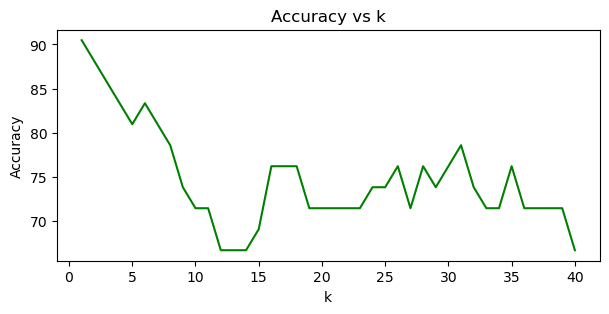

In [40]:
# parameters
kStart = 1;
kEnd = 40;

# initialize k vector that represents number of neighbors from kStart until kEnd
k = range(kStart, kEnd+1);

# calculate accuracy vector for each iteration of K neighbors
accVec = createAccVec(k, DTrain, XTest, YTest);

# plot the accuracy of the KNN vs K neighbors
plotKVec(k , accVec);

<span>Using KNN function with 1 to 40 neighbors, but with 2 new data division between train and data</span>

First Seed:


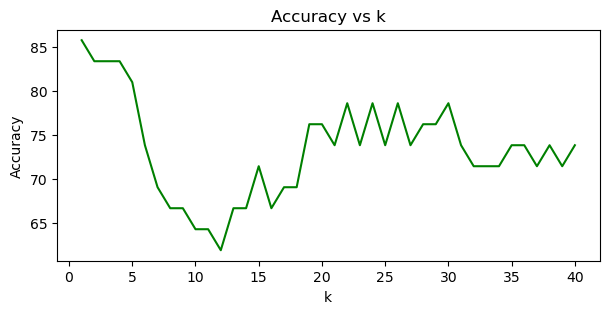

Second Seed:


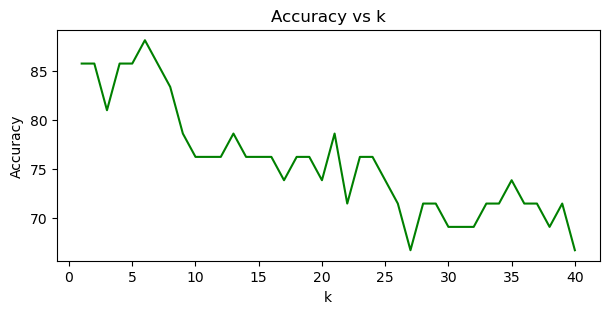

In [41]:
# using different seeds to shuffle data into new combinations of train and test datasets

# first seed
np.random.seed(10)
Data1 = np.random.permutation(Data)

# divide the full dataset into the train and test datasets
[DTrain1, DTest1, XTrain1, YTrain1, XTest1, YTest1] = setTrainTest(Data1, NTrain);

# calculate accuracy vector for each iteration of K neighbors
accVec1 = createAccVec(k, DTrain1, XTest1, YTest1);


# plot the accuracy of the KNN vs K neighbors
print('First Seed:');
plotKVec(k , accVec1);
plt.show();

# second seed
np.random.seed(20)
Data2 = np.random.permutation(Data)

# divide the full dataset into the train and test datasets
[DTrain2, DTest2, XTrain2, YTrain2, XTest2, YTest2] = setTrainTest(Data2, NTrain);

# calculate accuracy vector for each iteration of K neighbors
accVec2 = createAccVec(k, DTrain2, XTest2, YTest2);

# plot the accuracy of the KNN vs K neighbors
print('Second Seed:');
plotKVec(k , accVec2);

<span>Using KNN function with 1 to 40 neighbors, but with a vector of seeds, display the most frequent 'best K'</span>

In [42]:
kVec = [];

# for each seed, find the best k
for seedVal in [12, 47, 85, 797, 547, 548, 218, 564, 2147, 5216, 213, 54, 874]:
    
    # set seed to the currently selected seed, any random function will now use this seed
    np.random.seed(seedVal)
    
    # shuffle the data
    Data3 = np.random.permutation(Data)
    
    # divide the full dataset into the train and test datasets 
    [DTrain3, DTest3, XTrain3, YTrain3, XTest3, YTest3] = setTrainTest(Data3, NTrain);
    
    # calculate accuracy vector for each iteration of K neighbors
    accVec3 = createAccVec(k, DTrain3, XTest3, YTest3);

    kVec.append(np.argmax(accVec3)+k[0])

print(kVec)
kCounts = np.bincount(kVec)    
print(kCounts)
print(np.argmax(kCounts))

[2, 2, 2, 1, 5, 2, 2, 5, 1, 5, 3, 5, 5]
[0 2 5 1 0 5]
2


דיוק הסיווגים נובע מ-2 פרמטרים עיקריים : 
1. חלוקת המידה לסדרת מבחן וסדרת אימון.
2. מספר השכנים בהפעלת האלגוריתם KNN 
יש השפעה לבחירת סדרת האימון ,הן מבחינת מספר הדוגמאות בסדרה , והן החלוקה היחסית בין הדוגמאות בסדרה מבחינת הסיווג שלהן. <br>

מספר הדוגמאות שאנו בחרנו לסדרת האימון הוא כ 80% מהמידע הכללי, על מנת שיהיה לנו יותר מידע להתבסס עליו בעת סיווג דוגמאות חדשות לא מסווגות. <br>
תחילת הניסוי חילקנו את המידע באופן ישיר בהתאם לסידור שבו קיבלנו את המידע. <br> 
ולאחר שקיבלנו תוצאות דיוק לא טובות, תוך הבנה שאלגוריתם סיווג שלנו עובד נכון הגענו למסקנה כי הבעיה מצוייה בבחירת הדוגמאות ולכן החלטנו לחלק את המידע באופן רנדומלי ולקחת ממנו 80% לסדרת האימון. 

נקודה נוספת שהבחנו בה היא ההשפעה של  מספר השכנים שבחרנו באלגוריתם KNN  על אחוז הדיוק של הסיווג.<br>
ההנחה הנאיבית היא שאם ניקח מספר שכנים של K=1 כדי לסווג את הדוגמה החדשה אז נקבל את הדיוק הטוב ביותר עבורה, משום שהשכן שבחרנו הכי דומה אליו. אולם במצב זה, אנחנו מאבדים את ההשפעה שיש לשאר הדוגמאות שבסביבתו.<br> 
יחיד עם זאת בחירת k גדול מאבדת את ההשפעה של מרחק השכנים מהדוגמה החדשה.<br> 
נקודה חשובה נוספת היא שבחירת ה K  צריכה להיות ביחס למספר הדוגמאות שנמצאות בסדרת האימון כמה הן קרובות אחת לשנייה ומה השונות בניהן.<br>

לפיכך בניסוי שלנו הK המבטיח ביותר הוא K=2 ממדגם שעשינו.

<h4> -----------------------------------------------------------------------------------------------------------------------------------

<h1><u>PART B</u></h1>

<h2><u>Q9</u></h2>

<span>Testing the algorithm with coeff of size 2 studied in class</span>

In [43]:
#XTrain= pd.read_csv('Xtrain.txt', header = None).values
#XTest= pd.read_csv('Xtest.txt', header = None).values
#YTrain= pd.read_csv('Ytrain.txt', header = None).values
#YTest= pd.read_csv('Ytest.txt', header = None).values

#onesCol = np.ones([XTrain.shape[0], 1]);
#XTrain = np.append(onesCol, XTrain, axis=1);
#XTest = np.append(onesCol, XTrain, axis=1);

In [44]:
#dfCoefficients = pd.read_csv('Coefficients.txt')
#gdm = dfCoefficients[['gradient descent step index m']].values 
#Coefficients = dfCoefficients[dfCoefficients.columns[1:]].values # extract all columns except the first column -> extract X values from the data frame
#w_init = np.array(Coefficients[0]);

<span>Using the GD Algorithm for the sonar data</span>

In [45]:
#alpha = 0.0001250;
#alpha = 0.0112;
#alpha = 0.0102;
#alpha = 0.01250;
#alpha = 0.00125;
# parameters
NTrain = 166;

# divide the full dataset into the train and test datasets
[DTrain, DTest, XTrain, YTrain, XTest, YTest] = setTrainTest(Data, NTrain)
#parameters
alpha =0.01;
T = 620;

np.random.seed(34)
w_init = np.random.rand(XTrain.shape[1]+1);

gdm = np.array([0, 1, T/3, 2*T/3, T-1, T]).astype(int);
th = 0.5;

#tarining the classifier
w_t = runExperiment(XTrain, YTrain, T, alpha, w_init);

<h2><u>Q10</u></h2>

<h3><u>a</u></h3>

<span>Evaluating the classifier with the train dataset over T iterations with the given threshold
<br>While also printing the confusion matrix, cros entropy function and accuracy in the given gdm</span>

for iteration #0:
the confusion matrix is:
[[ 0. 80.]
 [ 0. 86.]]
the accuracy of this classifier is:
51.80722891566265%

for iteration #1:
the confusion matrix is:
[[ 0. 80.]
 [ 0. 86.]]
the accuracy of this classifier is:
51.80722891566265%

for iteration #206:
the confusion matrix is:
[[74.  6.]
 [29. 57.]]
the accuracy of this classifier is:
78.91566265060241%

for iteration #413:
the confusion matrix is:
[[61. 19.]
 [ 7. 79.]]
the accuracy of this classifier is:
84.33734939759037%

for iteration #619:
the confusion matrix is:
[[69. 11.]
 [ 9. 77.]]
the accuracy of this classifier is:
87.95180722891565%

for iteration #620:
the confusion matrix is:
[[70. 10.]
 [ 9. 77.]]
the accuracy of this classifier is:
88.55421686746988%



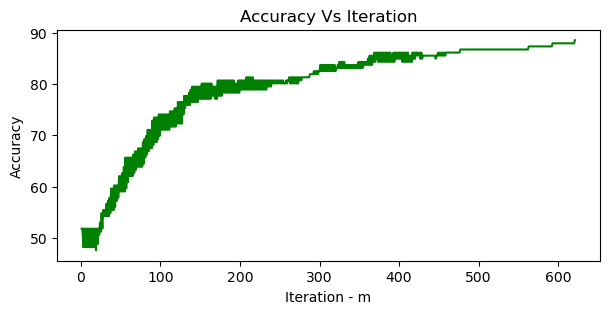

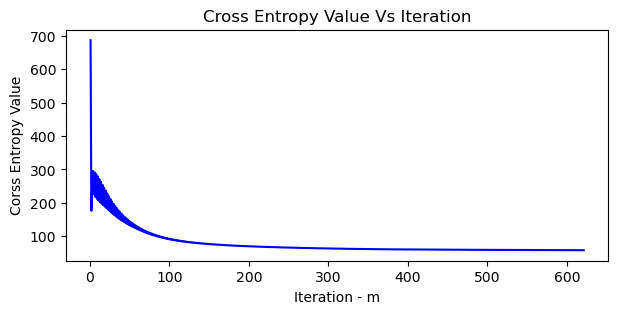

In [46]:
[confMatVecTrain,accuracyVecTrain,ceVecTrain,classifiedTrain] = evalClassifierOverIteration(XTrain,YTrain,w_t,th,T,gdm);

בסעיף זה ניתן לראות, כי ככל שהגדלנו את מספר האיטרציות באימון המסווג, הצלחנו להגיע למסווג מדוייק יותר.<br> בגרפים, ערך פונקציית הקנס, יורדת ככל שמספר האיטרציות בניסוי עולה.<br> במקביל ניתן לראות מגמת עלייה ביחס למספר האיטרציות. הדיוק המירבי אליו הגענו הוא 88.55% <br>

למעשה, ככל שערך בדיוק עולה, ערך פונקציית הקנס יורדת ונרצה לשמור על המצב הזה לאורך האימון. ישנם מצבים בהם הדיוק יהיה מירבי אך לא מיטבי משום שהוא יגרום לערך פונקציית הקנס לעלות. פונקציית הקנס מחזירה ערכים נמוכים עבור הסתברות גבוהה לסיווגים נכונים ולפיכך לכן ציפינו לראות התנהגות כזאת בשני הגרפים כאשר מתבצע אימון מוצלח. 

In [47]:
#the final classifaier
w_t[-1,:]

array([-4.78444097,  1.6582763 ,  0.58396361,  1.23130773,  1.87220312,
        2.30018448,  1.14448335, -0.54600524, -1.59394781,  3.01789356,
        2.32040614,  4.00820589,  2.57928393,  0.87737091, -0.39465652,
       -1.45873046, -2.3101464 , -0.81704258,  0.19119051,  0.71144349,
        1.00248509,  0.67469115,  0.62612194,  1.17274789,  1.41741238,
       -0.96964455, -0.16980306, -0.14657608,  0.36082756,  0.7577393 ,
        1.2778615 , -3.25120271,  0.89774294,  0.44934135, -0.9720093 ,
       -1.10943709, -2.05674102, -1.38657447,  0.8729195 ,  0.89314411,
       -2.66599563,  0.65896737,  1.20441033,  1.22881477,  2.92562638,
        3.11133521,  2.04953903,  1.03942949,  3.05002408,  2.10696118,
       -0.20727464,  0.59393917,  1.03475296,  0.28626428,  0.39524044,
       -0.09055219,  0.72027099,  0.80391741,  0.49964456,  1.05510422,
        0.19181787])

<h3><u>b</u></h3>

Evaluating the classifier with the <b>Test</b> dataset over T iterations with the given threshold <br> 
<span>While also printing the confusion matrix and accuracy in the given gdm</span>

for iteration #0:
the confusion matrix is:
[[ 0. 17.]
 [ 0. 25.]]
the accuracy of this classifier is:
59.523809523809526%

for iteration #1:
the confusion matrix is:
[[ 0. 17.]
 [ 0. 25.]]
the accuracy of this classifier is:
59.523809523809526%

for iteration #206:
the confusion matrix is:
[[16.  1.]
 [ 9. 16.]]
the accuracy of this classifier is:
76.19047619047619%

for iteration #413:
the confusion matrix is:
[[15.  2.]
 [ 6. 19.]]
the accuracy of this classifier is:
80.95238095238095%

for iteration #619:
the confusion matrix is:
[[16.  1.]
 [ 6. 19.]]
the accuracy of this classifier is:
83.33333333333334%

for iteration #620:
the confusion matrix is:
[[16.  1.]
 [ 6. 19.]]
the accuracy of this classifier is:
83.33333333333334%



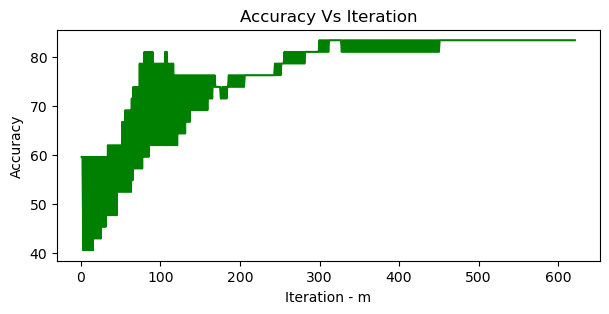

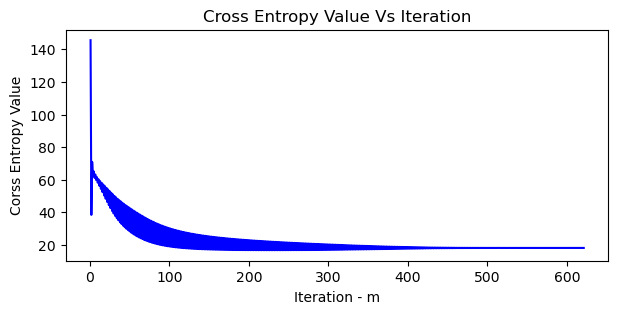

In [48]:
[confMatVecTest,accuracyVecTest,ceVecTest,classifiedTest] = evalClassifierOverIteration(XTest,YTest,w_t,th,T,gdm);

<h3><u>c</u></h3>

Evaluating the classifier with the <b>Train</b> dataset over T iterations with the given threshold <br> 
<span>Printing the confusion matrix and ROC graph for T=0, T/2 , T</span>

for iteration #0:
the confusion matrix is:
[[ 0. 80.]
 [ 0. 86.]]
the accuracy of this classifier is:
51.80722891566265%



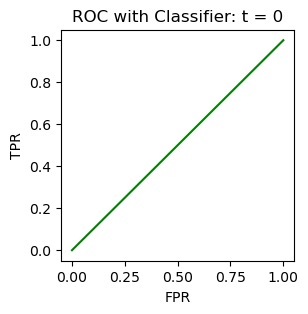

for iteration #310:
the confusion matrix is:
[[73.  7.]
 [20. 66.]]
the accuracy of this classifier is:
83.73493975903614%



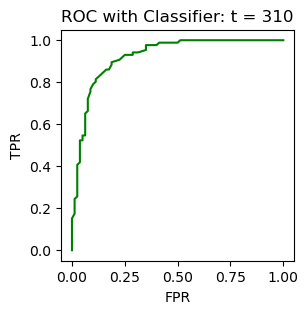

for iteration #620:
the confusion matrix is:
[[70. 10.]
 [ 9. 77.]]
the accuracy of this classifier is:
88.55421686746988%



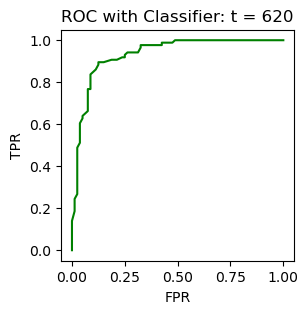

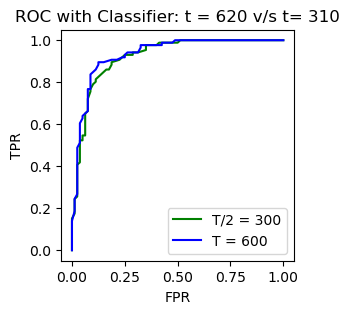

In [49]:
gdm = np.array([0, T/2, T]).astype(int)
thVec = np.linspace(0,1,100)

for idx, val in enumerate(gdm): 
    [TPR, FPR] = ROCGenVec(XTrain,YTrain,w_t[val, :],thVec)  
    [confMatVec,accuracyVec,ceVec,classified] = evalClassifier(XTrain,YTrain,w_t[val, :],th)
    print( "for iteration #" + str(gdm[idx]) + ":")
    printConfMatAcc(confMatVec, accuracyVec)    
    printROC(FPR, TPR, val);
    plt.show()
    
# T/2 v/s T
idx = int(T/2);
[TPR1, FPR1] = ROCGenVec(XTrain,YTrain,w_t[idx ,:],thVec);
[TPR2, FPR2] = ROCGenVec(XTrain,YTrain,w_t[T, :],thVec);
    
plt.figure(figsize = [3,3] )
plt.title('ROC with Classifier: t = ' + str(T)+ ' v/s t= ' + str(idx));
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(FPR1, TPR1, 'g' ,label = 'T/2 = 300')  
plt.plot(FPR2, TPR2, 'b' ,label = 'T = 600') 
plt.legend()



מטריצת הערבול, מציגה באיזה מהמקרים המודל שלנו הצליח לחזות את המצב הנכון ובאילו מהמקרים לא.<br>

עבור הריצה הראשונה - השתמשנו במסווג רנדומלי, ולכן השטח במתחת למסווג הוא חצי - מצב לא אידיאלי <br><br> 
עבור האיטרציה ה 310 ו ה 620 הצלחנו לחזות את המצב הנכון עבור יותר דוגמות כך הגדלנו את השטח תחת הגרף.<br><br>
מהשוואה בין שתי הריצות האחרונות ניתן לראות כי המסווג התקבל בריצה האחרונה לאחר 620 איטרציות הניב כמעט בכל המקרים לאותו FPR  ערך TPR טוב יותר ולכן תוצאות טובות יותר (קרובות יותר לפינה השמאלית העליונה) ומגדיל את השטח מתחת לגרף. 

<h3><u>d</u></h3>

Evaluating the classifier with the <b>Test</b> dataset over T iterations with the given threshold <br> 
<span>Printing the confusion matrix and ROC graph for T iterations</span>

Run on the Test
for iteration #620:
the confusion matrix is:
[[16.  1.]
 [ 6. 19.]]
the accuracy of this classifier is:
83.33333333333334%



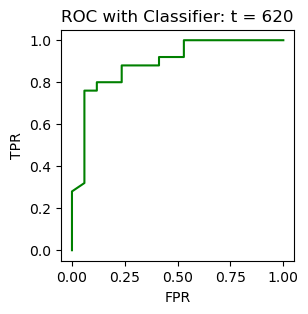

In [50]:
thVec = np.linspace(0,1,100) 
[TPR3, FPR3] = ROCGenVec(XTest,YTest,w_t[T, :],thVec)  
[confMatVec,accuracyVec,ceVec,classified] = evalClassifier(XTest,YTest,w_t[T, :],th)
print( "Run on the Test")
print( "for iteration #" + str(T) + ":")
printConfMatAcc(confMatVec, accuracyVec)    
printROC(FPR3, TPR3, val);
plt.show()


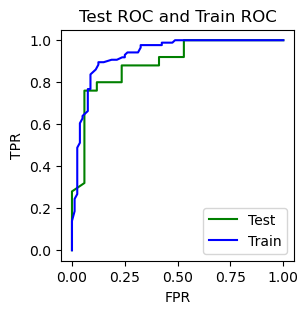

In [51]:
#Examination of the training series against the test series in the last iteration

plt.figure(figsize = [3,3] )
plt.title('Test ROC and Train ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(FPR3, TPR3, 'g' ,label = 'Test')  
plt.plot(FPR2, TPR2, 'b' ,label = 'Train')  
plt.legend()
plt.show()

<h2><u>Q11</u></h2>

<b><u>הקדמה:<b><u>

ראינו כי הביצועים של המסווג תלויים ב-5 פרמטרים עיקריים:
1. מספר האיטרציות לאימון המסווג - T
2. נקודת ההתחלה - w0
3. גודל הצעד - a
4. סידור המידע לסדרות אימון ומבחן.
5. היחס בין סוגי הדוגמאות בסדרות האימון והמבחן.

ביצועים מייטיבים של המסווג, תלויים בשילוב של כל הפרמטרים,
כאשר ערך מייטבי של פרמטר אחד מושפע מכל יתר הפרמטרים, כלומר הם לא בלתי תלויים.
ולכן, לא ניתן לחפש ערך מייטיבי לכל אחד מהם בנפרד.

עם זאת, יש טווח ערכים לכל אחד מהפרמטרים, שבו אנחנו יכולים להניח שהערך המייטבי נמצא בו.
אבל, ניתן לחלץ קשר מסויים, לדוגמא אם מקטינים את גודל הצעד, כנראה נצטרך להגדיל את מספר האיטרציות.  

<b><u>סוגייה 1: קביעת מספר האיטרציות <b><u>
    
כאשר נבחר לאמן את המסווג במספר נמוך של איטרציות, אנו יכולים לא להגיע למסווג המייטבי, כלומר אנחנו עלולים לקטוע את תהליך האימון באמצע שלו עוד לפני שהגיע לערכו המייטבי.
לעומת זאת, עם מספר גבוה של איטרציות, אנו יכולים לבזבז זמן חישוב יקר שלא ישפר את הביצועים מכיוון שהגענו כבר לערך מייטבי.
בנוסף, כתוצאה ממספר גבוה של איטרציות לאחר הגעה לאחר המייטבי, יכול לקרות מצב של אימון יתר שיפגע בסיווג דוגמאות עתידיות.<br>

את ה T המיטבי נבחר כאשר נראה התייצבות בגרף הדיוק תוך בחינת ההתנהגות של פונקציית הקנס כך שניקח את האיטרציה שמנפיקה את ערך פונקציית הקנס המינימאלי.<br><br> 
     
נסתכל על המידע שבחרנו בשאלה 10 ונבחן רק את השינוי במספר האיטרציות.<br>
    
ניתן לראות שהחל מאיטרציה 620 ישנה התייצבות על דיוק של 88.55% במשך 60  איטרציות. <br> 
לאחר מכן יש ירידה באחוזים ובאיטרציה ה 1000 הדיוק עלה בכ- חצי אחוז. אך ההבדל הוא שולי ולכן עדיף להישאר באזור של ה 600 איטרציות. 
<br>בחירה במספר איטרציות גבוה מ 620 עם הפרמטרים האלו  הייתה צורכת משאבים וזמן ריצה יקרים שלא בהכרח היו משפרים את ביצועי המסווג באופן משמעותי. <br>
    
ניתן לראות שעד איטרציה 470 ישנן עלייות וירידות , כלומר יש שיפור משמעותי בסיווג ובערך הדיוק של המסווג ולכן עצירת האימון באיטרציות אלה היו יכולות לגרום לכך שלא נמצא את המסווג המיטבי  

In [52]:
alpha = 0.01;
gdm = np.array([0, 1, T/3, 2*T/3, T-1, T]).astype(int);
th = 0.5;
np.random.seed(34)
w_init = np.random.rand(XTrain.shape[1]+1);

#change in iteration number
T = 1000;

w_t = runExperiment(XTrain, YTrain, T, alpha, w_init);

[confMatVec,accuracyVec,ceVec,classified] = evalClassifiers(XTrain,YTrain,w_t,th);

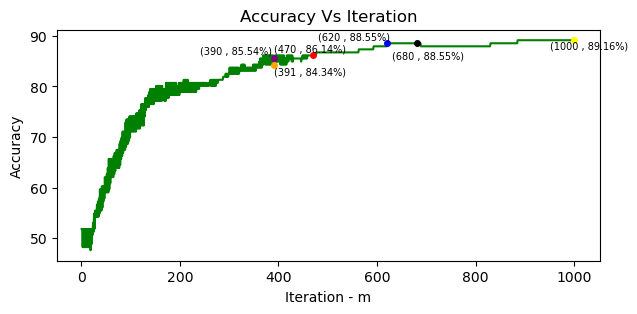

In [53]:
t = range(1,T+2) 
plotAccuracy(t, accuracyVec)

vec=[470,620,680,1000,391,390]
color = ['red','blue','black','yellow','orange','purple']
points=[]

for val in vec: 
    points.append([val,accuracyVec[val]])
    
#show points
for idx, val in enumerate(vec): 
    plt.plot(points[idx][0], points[idx][1], 'o', color=color[idx], markersize=4)

shift=[[-80,0.7],[-140,0.7],[-50,-3],[-50,-1.8],[0,-2],[-150,1]]
#text
for idx, val in enumerate(points): 
    plt.text(val[0]+shift[idx][0], val[1]+shift[idx][1],'('+ str(val[0])+' , '+ str(round(val[1],2))+'%)', fontsize=7)
    


    
<b><u>סוגייה 2: השפעת a ו- w0 על מספר האיטרציות <b><u>
    

בסוגייה זו נישאר עם המידע שהשתמשנו בו בשאלה 10 וניקח את מספר האיטרציות המיטבי אליו הגענו בסוגייה הקודמת.<br>
<b><u>השפעת a  <b><u> 
    
כאמור אלפא משפיע על גודל צעד התיקון שאנו מבצעים באימון המסווג  <br>

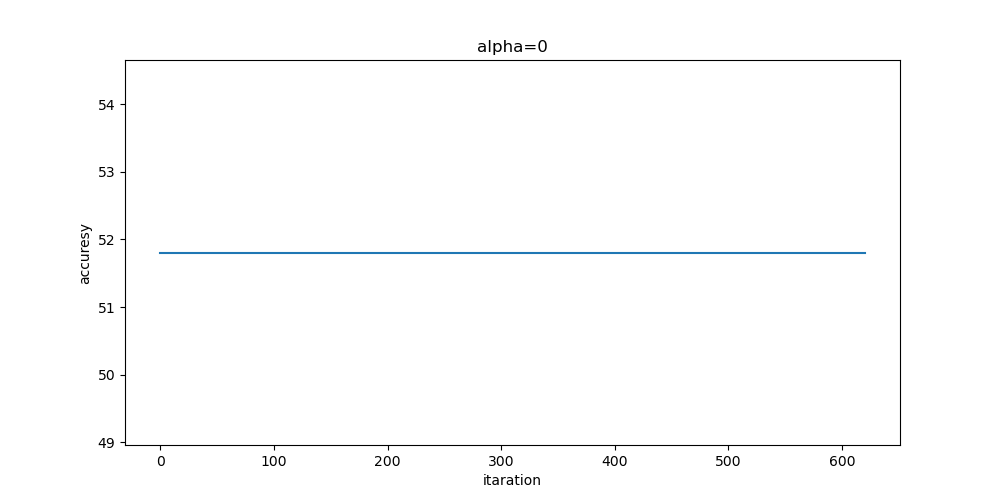

In [54]:
T =620;
np.random.seed(34)
w_init = np.random.rand(XTrain.shape[1]+1);
gdm = np.array([0, 1, T/3, 2*T/3, T-1, T]).astype(int);
th = 0.5;

images = []

alpha = [0,0.0001,0.001,0.01,0.1,1];
title = ['alpha=0','alpha=0.0001','alpha=0.001', 'alpha=0.01','alpha=0.1','alpha=1'];

for idx, val in enumerate(alpha):  
    # Create a plot
    fig, ax = plt.subplots(figsize=(10,5))
    w_t = runExperiment(XTrain, YTrain, T, val, w_init);
    [confMatVec,accuracyVec,ceVec,classified] = evalClassifiers(XTrain,YTrain,w_t,th);
    ax.plot(accuracyVec)
    ax.set_title(title[idx])
    ax.set_xlabel('itaration')
    ax.set_ylabel('accuresy')
    
    # Save the plot as an image
    filename = f'graph_{idx+1}.png'
    fig.savefig(filename)
    plt.close()
    
    # Add the image to the list
    images.append(imageio.imread(filename))

# Create the GIF from the images
imageio.mimsave('animation.gif', images, fps=0.5)

# Show the GIF
from IPython.display import Image
Image(filename="animation.gif", width = 600, height = 300)

נבחן את ההשפעה שיש לa על מספר האיטרציות הדרושות<br>
עבור a=0 ניתן לראות כי אין שום שינוי בביצועי המסווג משום שאנו לא מבצעים שינוי בפרמטרים של המסווג ולכן בכל איטרציה נקבל את המסווג הראשוני. <br><br>

עבור a =0.0001 ניתן לראות כי הוא צעד קטן מידי משום המסווג לא מצליח להתייצב על דיוק ספציפי במהלך האיטרציות האלו מה שאומר עם האלפא הזה יש צורך במספר איטרציות גדול יותר על מנת להגיע למסווג המיטבי <br><br>

עבור a=0.001 ניתן לראות כי הצלחנו להגיע לדיוק גבוה יותר מ a= 0.001 ולהתייצבות מספקת במספר האיטרציות <br><br>

עבור 0.01 גודל הצעד הוא גדול יותר ולכן הגענו לדיוק גבוה יותר.<br><br>

עבור 1 ו 0.1 אין התייצבות בגרף הדיוק.<br><br>


<b><u>השפעת w0   <b><u> 
    
כאמור w0 משפיע על נקודת ההתחלה של אימון המסווג  <br>

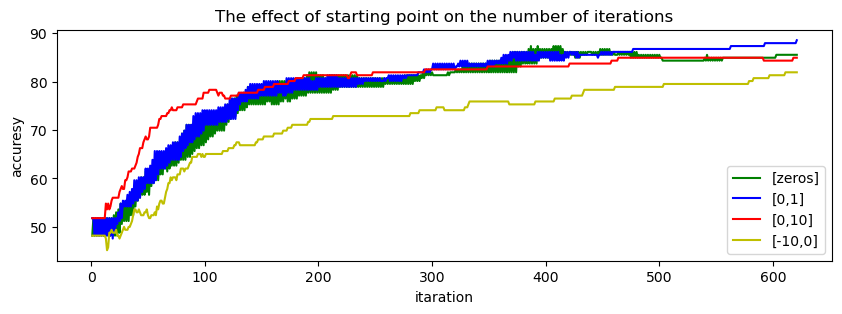

In [55]:
#parameters
T = 620;
t = range(1,T+2) 
alpha =0.01;
th = 0.5;


a=np.zeros(XTrain.shape[1]+1)
np.random.seed(34)
b=np.random.rand(XTrain.shape[1]+1)
np.random.seed(35)
c=np.random.uniform(0, 10, size=XTrain.shape[1]+1)
np.random.seed(36)
d=np.random.uniform(-10, 0, size=XTrain.shape[1]+1)

fig, ax = plt.subplots(figsize=(10, 3))
ax.set_title('The effect of starting point on the number of iterations')
ax.set_xlabel('itaration')
ax.set_ylabel('accuresy')

#tarining the classifier
w_t_a = runExperiment(XTrain, YTrain, T, alpha, a);
[confMatVec1,accuracyVec1,ceVec1,classified1] = evalClassifiers(XTrain,YTrain,w_t_a,th);

plt.plot(t,accuracyVec1,'g', label="[zeros]")
w_t_b = runExperiment(XTrain, YTrain, T, alpha, b);
[confMatVec2,accuracyVec2,ceVec2,classified2] = evalClassifiers(XTrain,YTrain,w_t_b,th);
plt.plot(t,accuracyVec2,'b' ,label="[0,1]")
w_t_c = runExperiment(XTrain, YTrain, T, alpha, c);
[confMatVec3,accuracyVec3,ceVec3,classified3] = evalClassifiers(XTrain,YTrain,w_t_c,th);
plt.plot(t,accuracyVec3,'r' , label="[0,10]")

w_t_d = runExperiment(XTrain, YTrain, T, alpha, d);
[confMatVec4,accuracyVec4,ceVec4,classified4] = evalClassifiers(XTrain,YTrain,w_t_d,th);
plt.plot(t,accuracyVec4,'y' , label="[-10,0]")
plt.legend()
plt.show();




נבחן את ההשפעה שיש לנקודת ההתחלה על מספר האיטרציות הדרושות<br>
בגרף למעלה ניתן לראות 4 מקרים שונים. כל מקרה נבדל זה מזה בנקודת ההתחלה שבה התחלנו את האימון. 
הגרף הצהוב מתאר מסווג התחלתי שמקבל ערכים רנדומליים בין 0 ל 10-. הערכים הללו רחוקים מהערכים של הדוגמות של האבנים והמתכות ולכן ניתן לראות כי אנו מגיעים לאחוז נמוך מכל שאר האפשרויות. <br><br> 
הגרף האדום מקבל ערכים בין 0 ל 10 ,ניתן לראות כי אנו מקבלים ביצועים טובים מהגרף הצהוב אך עדיין הדיוק לא מספק ואולי היינו נדרשים למספר איטרציות גבוה יותר 
הגרפים הכחולים וירוקים מביאים תוצאות טובות יותר באיטרציות מתקדמות, אך הערכים של נקודת ההתחלה של הגרף הכחול הוא הכי טוב מאחר שהוא הכי קרוב בערכיו לדוגמות שצריך לסווג.והוא אכן הניב את הדיוק הגבוה ביותר באיטרציה האחרונה. 


<b><u>סוגייה 3: ההשפעה של a ו- w0 על נקודת הסיום <b><u>
    
<b><u> ההשפעה של w0 על נקודת הסיום <b><u>
    
<br>הראשון - ערך המסווג ההתחלתי כולו אפסים. <br> 
השני ערך המסווג מקבלים ערכים רנדומלים בין 0 ל 1 כמו הערכים שנמצאים במידע שלנו <br>
השלישי-  ערכים רנדומלים בין 0 ל 10 <br>
הרביעי - ערכים רנדומלים בין 0 ל 100 <br>
החמישי - ערכים רנדומליים בין 100-200<br><br><br><br>

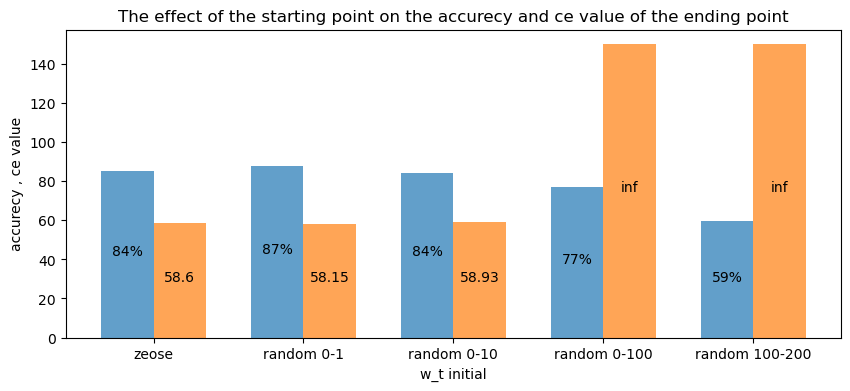

In [56]:
#parameters
alpha =0.01;
T = 600;
th = 0.5;
gdm = np.array([0, 1, T/3, 2*T/3, T-1, T]).astype(int);

a=np.zeros(XTrain.shape[1]+1)
np.random.seed(34)
b=np.random.rand(XTrain.shape[1]+1)
np.random.seed(35)
c=np.random.uniform(0, 10, size=XTrain.shape[1]+1)
np.random.seed(36)
d=np.random.uniform(0, 100, size=XTrain.shape[1]+1)
np.random.seed(37)
e=np.random.uniform(100, 200, size=XTrain.shape[1]+1)

w_t=[]

#tarining the classifier
w_t_a = runExperiment(XTrain, YTrain, T, alpha, a);
[confMatVec1,accuracyVec1,ceVec1,classified1] = evalClassifiers(XTrain,YTrain,w_t_a,th);

w_t_b = runExperiment(XTrain, YTrain, T, alpha, b);
[confMatVec2,accuracyVec2,ceVec2,classified2] = evalClassifiers(XTrain,YTrain,w_t_b,th);

w_t_c = runExperiment(XTrain, YTrain, T, alpha, c);
[confMatVec3,accuracyVec3,ceVec3,classified3] = evalClassifiers(XTrain,YTrain,w_t_c,th);

w_t_d = runExperiment(XTrain, YTrain, T, alpha, d);
[confMatVec4,accuracyVec4,ceVec4,classified4] = evalClassifiers(XTrain,YTrain,w_t_d,th);

w_t_e= runExperiment(XTrain, YTrain, T, alpha, e);
[confMatVec5,accuracyVec5,ceVec5,classified5] = evalClassifiers(XTrain,YTrain,w_t_e,th);

x=np.array([0,1,2,3,4])
xlable =["zeose","random 0-1","random 0-10","random 0-100",'random 100-200'];
acc=[accuracyVec1[T],accuracyVec2[T],accuracyVec3[T],accuracyVec4[T],accuracyVec5[T]]

ce=np.array([ceVec1[T],ceVec2[T],ceVec3[T],ceVec4[T],ceVec5[T]])
ce[np.isnan(ce)]=150;


width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(x-(width/2), acc,width,linewidth=1, alpha=0.7 )
ax.bar(x+(width/2), ce,width,linewidth=1, alpha=0.7)



for idx in range(len(x)):
    plt.text(idx-(width/2), acc[idx]//2, str(int(acc[idx]))+'%', ha='center')
    if (int(ce[idx])==150):
        plt.text(idx+(width/2), ce[idx]//2, "inf", ha='center')
    else:
        plt.text(idx+(width/2), ce[idx]//2, str(round(ce[idx],2)), ha='center')
    
    
plt.title("The effect of the starting point on the accurecy and ce value of the ending point")
plt.xlabel('w_t initial')
plt.xticks(x, xlable)
plt.ylabel('accurecy , ce value')
plt.show()

בגרף ניתן לראות את ההשפעה של נקודת ההתחלה על נקדות הסיום של האלגוריתם.<br>
עבור נקודות התחלה רחוקות מאוד מהערכים של הדוגמות במידע שלנו, random 100-200 ו random 0-100  ניתן לראות כי אחוזי המסווג באיטרציה האחרונה נמוכים 59% ו 77% בהתאמה, וכי ערך פונקצית הקנס שלהן מתבדר.השונות בפרמטרים היא גדולה ולכן עם גורם התיקון הנוכחי לא נגיע לדיוק המריבי במספר האיטרציות הזה.
 <br>
עבור שאר נקודות ההתחלה ניתן לראות כי אנו נמצאים בערכים דומים בפונקציית הקנס והם נבדלים זה מזה גם בדיוק של המסווג הסופי מאופי הפרמטרים שלהם. 


    
<b><u> ההשפעה של a על נקודת הסיום <b><u>
    

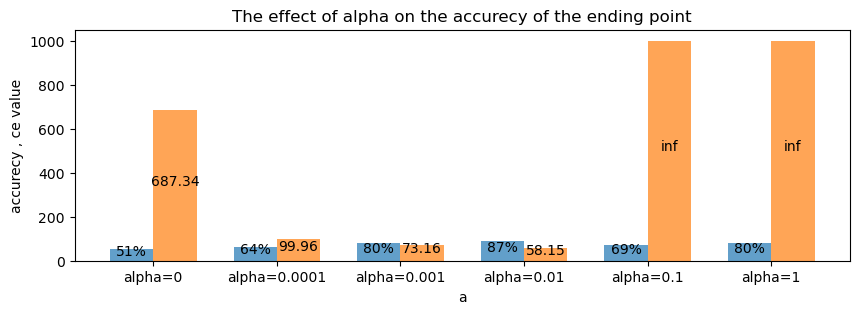

In [57]:
#parameters
alpha = [0,0.0001,0.001,0.01,0.1,1];
np.random.seed(34)
w_init = np.random.rand(XTrain.shape[1]+1);
th = 0.5;

#tarining the classifier
w_t=[]
acc=[]
ce=[]

for idx, val in enumerate(alpha):
    w_t1 = runExperiment(XTrain, YTrain, T, val, w_init);
    w_t.append(w_t1)
    [confMatVec,accuracyVec,ceVec,classified] = evalClassifiers(XTrain,YTrain,w_t[idx],th)
    acc.append(accuracyVec[T])
    ce.append(ceVec[T])
    
ce = np.array(ce)
x=np.array([0,1,2,3,4,5])               
xlable =['alpha=0','alpha=0.0001','alpha=0.001', 'alpha=0.01','alpha=0.1','alpha=1'];
ce[np.isnan(ce)]=1000;

width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(10, 3))
ax.bar(x-(width/2), acc,width,linewidth=2, alpha=0.7 )
ax.bar(x+(width/2), ce,width,linewidth=2, alpha=0.7 )



for idx in range(len(x)):
    plt.text(idx-(width/2), acc[idx]//2, str(int(acc[idx]))+'%', ha='center')
    if (int(ce[idx])==1000):
        plt.text(idx+(width/2), ce[idx]//2, "inf", ha='center')
    else:
        plt.text(idx+(width/2), ce[idx]//2, str(round(ce[idx],2)), ha='center')
    
plt.title("The effect of alpha on the accurecy of the ending point")
plt.xlabel('a')
plt.xticks(x, xlable)
plt.ylabel('accurecy , ce value')
plt.show()

בגרף זה ניתן לראות את ההשפעה של a על הדיוק של המסווג בנקודת הסיום של האלגוריתם. <br>
עבור a = 0 ניתן לראות דיוק נמוך וערך פונקציית קנס גבוה מאוד מכיוון שלא עשינו שום אימון 
עבור a=0.0001 רואים כי מתבצע אימון אך הערך של פונקציית הקנס הוא גבוה מידי.
עבור a=0.001 הגענו לאחוז דיוק גבוה של המסווג עם פונקציית קנס נמוכה 
עבור a=0.01 אחוז הדיוק הוא הבריבי ביותר וכן ערך פונקציית הקס היא הנמוכה ביותר והכי אידיאלית מבין האפשרוית. 
עבור a=0.1 ו a = 1 ניתן לראות כי ערך פונקציית הקנס היא מתבדרת ולכן לא נרצה להגיע לערכי a האלו.  



<b><u>סוגייה 4:חלוקת המידע לסדרת אימון וסדרת מבחן  <b><u> <br>
    
כאמור בהקדמה, סידור המידע הנתון לסדרות אימון ומבחן משפיעות על התוצאות של אלגוריתם הלמידה. <br>
בהגיענו לניסוי ביצענו חלוקה ישירה של המידע אך ראינו כי קיבלנו תוצאות לא טובות , אחוזי הדיוק היו נמוכים מאוד. החלטנו לשנות את הסדר של הדוגמות במידע (ערבוב) ורק אז לחלק אותן לסדרת אימון וסדרת מבחן 
ניתן לראות כי עבור כל סידור יש תוצאות שונות.<br><br><br> 

בניסוי שלנו בחרנו חלוקה אחת אך אם היינו בוחנים מספר חלוקות היינו לוקחים את התוצאה הממוצע של המסווגים 

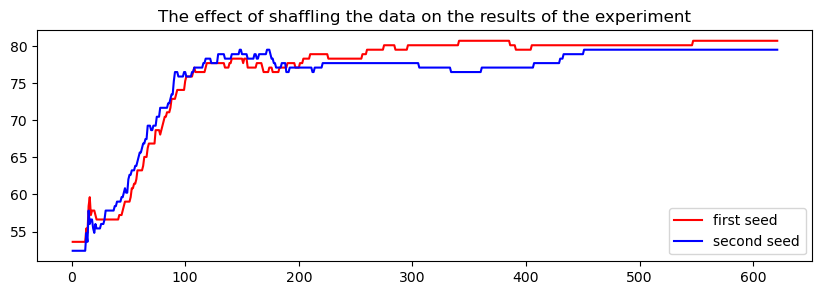

In [58]:
# using different seeds to shuffle data into new combinations of train and test datasets
alpha =0.001;
T = 620;
np.random.seed(34)
w_init = np.random.rand(XTrain.shape[1]+1);
gdm = np.array([0, 1, T/3, 2*T/3, T-1, T]).astype(int);
th = 0.5;

fig, ax = plt.subplots(figsize=(10, 3))
# first seed
np.random.seed(56)
Data1 = np.random.permutation(Data)

# divide the full dataset into the train and test datasets
[DTrain1, DTest1, XTrain1, YTrain1, XTest1, YTest1] = setTrainTest(Data1, NTrain);


#tarining the classifier
w_t1 = runExperiment(XTrain1, YTrain1, T, alpha, w_init);
[confMatVec1,accuracyVec1,ceVec1,classified1] = evalClassifiers(XTrain1,YTrain1,w_t1,th);

plt.plot(t,accuracyVec1,'r' , label="first seed")
plt.legend()
# second seed
np.random.seed(20)
Data2 = np.random.permutation(Data)

# divide the full dataset into the train and test datasets
[DTrain2, DTest2, XTrain2, YTrain2, XTest2, YTest2] = setTrainTest(Data2, NTrain);


w_t2 = runExperiment(XTrain2, YTrain2, T, alpha, w_init);
[confMatVec2,accuracyVec2,ceVec2,classified2] = evalClassifiers(XTrain2,YTrain2,w_t2,th);


plt.plot(t,accuracyVec2,'b' , label="second seed")
plt.title("The effect of shaffling the data on the results of the experiment")
plt.legend()
plt.show();



<b><u>סוגייה 5:השפעת הבחירות  <b><u>
    
<br>חלוקת מספר הדוגמות בדאטה לסדרת אימון וסדרת מבחן משפיעה גם היא על תוצאות הניסוי. יש לשים לב כי יש מספיק דוגמות בסדרת האימון על מנת שהמסווג יוכל להתאמן בהתאם עם מספיק מידע ויוכל להביא תוצאות נכונות בדוגמות עתידיות. <br>
בנוסף חשוב לשים לב ליחס של הדוגמות המסווגות כאבן והדוגמות המסווגות כמתכת מאחר ואם יהיו דוגמות רק מסוג אחד הסיווג לא יהיה מיטיבי.
 



55
========================= Details of ratio = 0.5: =========================
Number of Total Examples: 208
Number of Train Examples: 166
Number of Test Examples: 42
Number of features in the data: 60
Number of rock examples in the train data: 55
Number of metal examples in the train data: 111
Number of rock examples in the test data: 42
Number of metal examples in the test data: 0
Rock/Metal Ratio in full data: 0.8738738738738738
Rock/Metal Ratio in train data: 0.4954954954954955
Rock/Metal Ratio in test data: inf
65
========================= Details of ratio = 0.65: =========================
Number of Total Examples: 208
Number of Train Examples: 166
Number of Test Examples: 42
Number of features in the data: 60
Number of rock examples in the train data: 65
Number of metal examples in the train data: 101
Number of rock examples in the test data: 32
Number of metal examples in the test data: 10
Rock/Metal Ratio in full data: 0.8738738738738738
Rock/Metal Ratio in train data: 0.643564

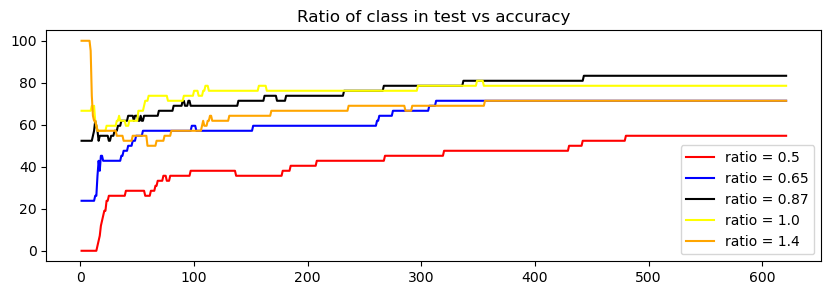

In [59]:
T = 620;
t = range(1,T+2) 
alpha = 0.00125
np.random.seed(34)
Data1 = np.random.permutation(Data)

fig, ax = plt.subplots(figsize=(10, 3))
ratioVec = np.array([0.5,0.65, 0.87,1, 1.4]);
color = ['red','blue','black','yellow','orange','purple']

for idx,ratio in enumerate(ratioVec):
    # divide the full dataset into the train and test datasets with class based on the percentage
    [DTrain, DTest, XTrain, YTrain, XTest, YTest] = setTrainTestRatio(Data1, NTrain, ratio);
    print('========================= Details of ratio = ' + str(ratio) + ": =========================");
    printDataDetails(XTrain, XTest, YTrain, YTest);
    w_t = runExperiment(XTrain, YTrain, T, alpha, w_init);
    [confMatVec,accuracyVec,ceVec,classified] = evalClassifiers(XTest,YTest,w_t,th);

    plt.plot(t,accuracyVec, color=color[idx] , label="ratio = " + str(ratio))
    plt.title("Ratio of class in test vs accuracy")
    
plt.legend()    
plt.show();

    
יחס הדוגמות בסדרת האימון וסדרת המבחן משפיע על אחוזי הדיוק של המסווג. <br>
נחפש מצב שמתאים לפילוג הנוכחי של המידע. שאצלנו היחס בין הדגומות הוא 0.87 <br> נראה כי אם נחלק את המידע באופן שבו כל דוגמות המתכת יהיו בסדרת האימון לא נקבל אימון מיטבית באותו האופן לגבי חלוקה שבה כל הדוגמות בסדרת האימון הן אבנים.<br>
בנוסף אם יחס החלוקה הוא רחוק מאוד מהפילוג הנוכחי של המידע כמו בגרף 0.65 , 1 נקבל תוצאות פחות מיטביות עבטר דוגמות עתידות. <br>
אם נחלק את המידע בהתאם לנתונים נקבל את אחוז הדיוק הגבוה ביותר.




<b><u>סוגייה 6:שגיאת האימון מול שגיאת המבחן  <b><u>
    
 



In [60]:
# parameters
NTrain = 166;

# divide the full dataset into the train and test datasets
[DTrain, DTest, XTrain, YTrain, XTest, YTest] = setTrainTest(Data, NTrain)


#parameters
alpha =0.0001;
T = 2000;

np.random.seed(34)
w_init = np.random.rand(XTrain.shape[1]+1);

gdm = np.array([300, 621, 2*T/3, 1800, T]).astype(int);
th = 0.5;

#tarining the classifier
w_t = runExperiment(XTrain, YTrain, T, alpha, w_init);

trainacc=[];
testacc=[];

for val in gdm:
 
    w_t = runExperiment(XTrain, YTrain, val, alpha, w_init);
   
    [confMatVecTrain,accuracyVecTrain,ceVecTrain,classifiedTrain] = evalClassifiers(XTrain,YTrain,w_t,th);
    trainacc.append(accuracyVecTrain[val]);

    [confMatVecTest,accuracyVecTest,ceVecTest,classifiedTest] = evalClassifiers(XTest,YTest,w_t,th);
    testacc.append(accuracyVecTest[val])

   
data = {'' :[1,2,3,4,5],
        'Iteration num': gdm,
        'Train accurecy': trainacc,
        'Test accureay': testacc,
      }

df = pd.DataFrame(data)
df = df.style.hide_index()

display(df)





,Iteration num,Train accurecy,Test accureay
1,300,57.831325,59.523810
2,621,65.060241,61.904762
3,1333,77.108434,80.952381
4,1800,78.915663,80.952381
5,2000,81.325301,78.571429


 בניסוי בחנו 2 מקרים. את דיוק במסווג שהגענו אליו בניסוי על סדרת האימון, שהלמידה של המסוגג מתבססת עליה. ואת הדיוק שלו על סדרת המבחן שמייצגת דוגמות עתידיות לא מסווגות.<br>
לא תמיד הדיוק אליו הגענו על סדרת האימון מהווה מדד אמין לדיוק סדרת המבחן.<br>
בשלושת הדוגמות הראשונות ניתן לראות כי ככל שהגדלנו את מספר האיטרציות, הדיוק של המסווג על סדרת המבחן עלה ובהתאם גם הדיוק של במסווג על סדרת המבחן.<br>
לעומת זאת, באימון המסווג לאחר 1800 איטרציות הצלחנו לעלות את אחוז בדיוק של המסווג על סדרת האימון אך לא הצלחנו לעלות בדיוק שלו על סדרת המבחן.<br>
ובריצה האחרונה ניתן לראות ירידה באחוזי הדיוק על סדרת המבחן למרות שהצלחנו להעלות את הדיוק על סדרת האימון. 




<b><u>סוגייה 7:השפעת a על דיוק המסווג  <b><u>
    
 



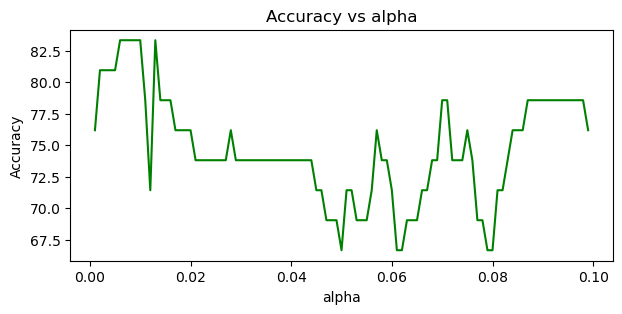

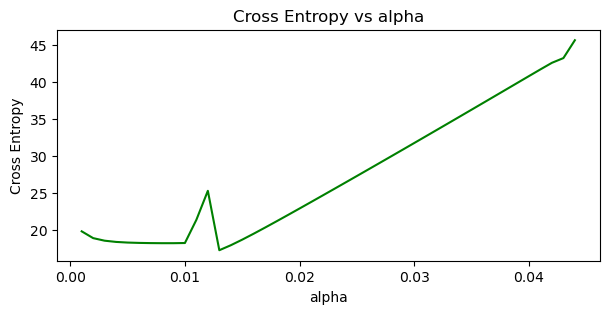

In [61]:
# represents the values of alpha to be evaluated
alphaVec = np.arange(0.001, 0.1, 0.001);

T = 620;
np.random.seed(34)
w_init = np.random.rand(XTrain.shape[1]+1);
th = 0.5;

# representing the vector of accuracy result of training with the respected alpha in each iteration
accRes = [];
ceRes = [];

# for each alpha evaluate the classifier and append the accuracy to the accRes vector
for idx, alpha in enumerate(alphaVec):
    w_t = runExperiment(XTrain, YTrain, T, alpha, w_init);
    [confMatVec,accuracyVec,ceVec,classified] = evalClassifier(XTest,YTest,w_t[-1,:],th);
    accRes.append(accuracyVec);
    ceRes.append(ceVec);

# plot the accuracy vs alpha
plotAccRes(alphaVec, accRes);

# plot the cross entropy vs alpha
plotCeRes(alphaVec, ceRes);

 בניסוי ראינו מה ערך פונקציית הקנס עבור כל a שנמצא בטווח (0.1, 0.001) בקפיצות של 0.001 כאשר מספר האיטרציות הוא 620<br>
ניתן לראות כי קיבלנו ערך מיטבי לפונקציית הקנס בערך a קרוב מאוד לערך שבו אנו משתמשים.<br>



<b><u>סוגייה 8:השפעת מספר הדוגמאות במבחן ובאימון  <b><u>
    
 



נראה תחילה בקפיצות של 10 כיצד בחירת גודלו של מספר הדוגמאות באימון משפיע על הדיוק, 
בכך שנבדוק ממוצע דיוק בסידים שונים לכל גודל

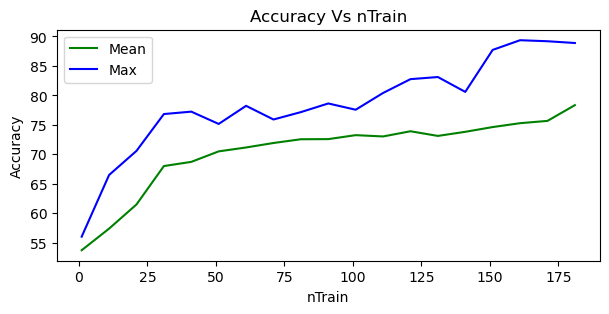

Mean:
max accuracy = 78.34757834757835
for nTrain = 181
Max:
max accuracy = 89.36170212765957
for nTrain = 161


In [62]:
#parameters
alpha =0.00125;
T = 620;

np.random.seed(34)
w_init = np.random.rand(XTrain.shape[1]+1);
th = 0.5;

nTrainVec = np.arange(1, 190, 10, dtype=int);

accuracyVecMean4 = [];
accuracyVecMax4 = [];

accuracyVec4_s = [];

for nTrain in nTrainVec:    
    # for each seed, find the best acc
    for seedVal in [12, 47, 85, 797, 547, 548, 218, 564, 2147, 5216, 213, 54, 874]:

        # set seed to the currently selected seed, any random function will now use this seed
        np.random.seed(seedVal)

        # shuffle the data
        Data4 = np.random.permutation(Data)

        # divide the full dataset into the train and test datasets 
        [DTrain4, DTest4, XTrain4, YTrain4, XTest4, YTest4] = setTrainTest(Data4, nTrain);
        
        #starining the classifier
        w_t = runExperiment(XTrain4, YTrain4, T, alpha, w_init);
        
        # run experiment for the specific seed and ntrain
        [confMat4,accuracy4,ce4,classified4] = evalClassifier(XTest4,YTest4,w_t[-1,:],th)

        accuracyVec4_s.append(accuracy4)
        
    accuracyVecMean4.append(np.mean(accuracyVec4_s));
    accuracyVecMax4.append(max(accuracyVec4_s));
    accuracyVec4_s = [];  
    
plt.figure(figsize = [7,3] )
plt.title('Accuracy Vs nTrain')
plt.xlabel('nTrain')
plt.ylabel('Accuracy')
plt.plot(nTrainVec, accuracyVecMean4, 'g', label='Mean')
plt.plot(nTrainVec, accuracyVecMax4, 'b', label='Max')  
plt.legend()
plt.show()

print('Mean:')
print('max accuracy = ' + str(max(accuracyVecMean4)))
print('for nTrain = ' + str(nTrainVec[np.argmax(accuracyVecMean4)]))
print('Max:')
print('max accuracy = ' + str(max(accuracyVecMax4)))
print('for nTrain = ' + str(nTrainVec[np.argmax(accuracyVecMax4)]))

נראה כי בבדיקה זאת מספר הדוגמאות באימון המיטבי התקבל עבור nTrain=181

כעת נריץ בדיקה יותר ממוקדת בקפיצות של 1 באזור בו ראינו את הקפיצה בדיוק.

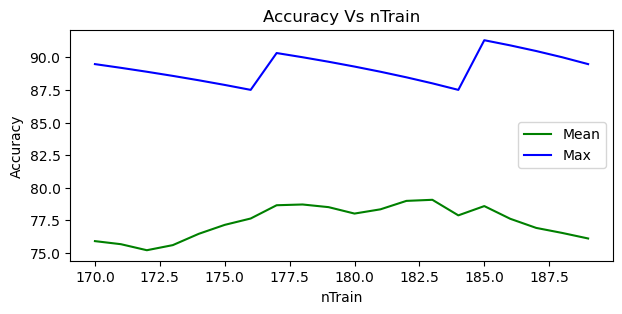

Mean:
max accuracy = 79.07692307692308
for nTrain = 183
Max:
max accuracy = 91.30434782608695
for nTrain = 185


In [63]:
#parameters
alpha =0.00125;
T = 620;

np.random.seed(34)
w_init = np.random.rand(XTrain.shape[1]+1);
th = 0.5;

nTrainVec = np.arange(170, 190, 1, dtype=int);

accuracyVecMean4 = [];
accuracyVecMax4 = [];

accuracyVec4_s = [];

for nTrain in nTrainVec:    
    # for each seed, find the best acc
    for seedVal in [12, 47, 85, 797, 547, 548, 218, 564, 2147, 5216, 213, 54, 874]:

        # set seed to the currently selected seed, any random function will now use this seed
        np.random.seed(seedVal)

        # shuffle the data
        Data4 = np.random.permutation(Data)

        # divide the full dataset into the train and test datasets 
        [DTrain4, DTest4, XTrain4, YTrain4, XTest4, YTest4] = setTrainTest(Data4, nTrain);
        
        #starining the classifier
        w_t = runExperiment(XTrain4, YTrain4, T, alpha, w_init);
        
        # run experiment for the specific seed and ntrain
        [confMat4,accuracy4,ce4,classified4] = evalClassifier(XTest4,YTest4,w_t[-1,:],th)

        accuracyVec4_s.append(accuracy4)
        
    accuracyVecMean4.append(np.mean(accuracyVec4_s));
    accuracyVecMax4.append(max(accuracyVec4_s));
    accuracyVec4_s = [];  
    
plt.figure(figsize = [7,3] )
plt.title('Accuracy Vs nTrain')
plt.xlabel('nTrain')
plt.ylabel('Accuracy')
plt.plot(nTrainVec, accuracyVecMean4, 'g', label='Mean')
plt.plot(nTrainVec, accuracyVecMax4, 'b', label='Max') 
plt.legend()
plt.show()

print('Mean:')
print('max accuracy = ' + str(max(accuracyVecMean4)))
print('for nTrain = ' + str(nTrainVec[np.argmax(accuracyVecMean4)]))
print('Max:')
print('max accuracy = ' + str(max(accuracyVecMax4)))
print('for nTrain = ' + str(nTrainVec[np.argmax(accuracyVecMax4)]))

נראה כי בבדיקה זאת מספר הדוגמאות באימון המיטבי התקבל עבור nTrain=185

<h1><u>PART C</u></h1>

<h2><u>Q12</u></h2>

<span>Data's mean and standard deviation for each feature</span>

<span>As we can see, the data is not normalized</span>

In [64]:
printMeanSTD(Data[:,:-1])

mean: 
[0.02916394 0.03843654 0.04383221 0.05389231 0.0752024  0.10457019
 0.12174663 0.13479904 0.17800288 0.20825913 0.23601298 0.25022115
 0.27330529 0.29656827 0.32020144 0.37848654 0.41598317 0.45231827
 0.50481154 0.56304663 0.6090601  0.624275   0.646975   0.67265433
 0.67542356 0.69986635 0.70215481 0.69402404 0.64207404 0.58092788
 0.50447548 0.43904038 0.41721971 0.40323317 0.39257115 0.3848476
 0.36380673 0.33965721 0.32579952 0.31120673 0.28925192 0.27829327
 0.24654183 0.214075   0.19723221 0.16063125 0.12245288 0.09142404
 0.05192885 0.02042404 0.01606875 0.01342019 0.01070913 0.01094087
 0.00929038 0.00822163 0.00782019 0.00794904 0.00794135 0.00650721]
standard deviation: 
[0.02293558 0.0328806  0.03833563 0.04641598 0.05541847 0.05896319
 0.06163918 0.08494724 0.11810226 0.13409222 0.13238522 0.13973487
 0.14062284 0.16407856 0.2049324  0.23209006 0.26304248 0.2608999
 0.25736744 0.26202066 0.25719764 0.25526727 0.2495733  0.23854072
 0.24433696 0.23665678 0.24506573 0

<span>Normalize the data set</span>

In [65]:
# deep copy the full dataset so re-run will not overwrite the original dataset
Data_norm = Data.copy();

# normalize the dataset copy, only need to normalize the features and not the classification
Data_norm[:,:-1] = normData(Data_norm[:,:-1]);

# divide the full normalized dataset into the train and test datasets
#[DTrain_norm, DTest_norm, XTrain_norm, YTrain_norm, XTest_norm, YTest_norm] = setTrainTestRatio(Data_norm, NTrain, 0.87);
[DTrain_norm, DTest_norm, XTrain_norm, YTrain_norm, XTest_norm, YTest_norm] = setTrainTest(Data_norm, NTrain)


<span>Now the features are normalized (mean is close to 0 for each feature, standard deviation is 1 for each feature)</span>

In [66]:
printMeanSTD(Data_norm[:,:-1])

mean: 
[-1.70803542e-16 -5.46571335e-16  6.93889390e-16 -1.40912922e-16
 -1.69736020e-16  4.72912308e-16 -1.28636418e-16 -2.73285668e-16
 -8.57754039e-16 -6.23566369e-16  3.91780625e-16  8.12384348e-16
  4.59034520e-17  6.43715850e-16 -3.37336996e-16  2.56205313e-16
  7.00294523e-16 -1.98559118e-16 -5.04937972e-16 -4.24873811e-16
 -1.72404825e-15  7.81959967e-16  1.41980444e-16  9.76782757e-16
 -7.54738152e-16  1.50307117e-15  2.15639472e-16 -1.49453099e-15
 -8.27329658e-16 -1.39845400e-15 -1.49453099e-17 -3.86443014e-16
 -2.56205313e-17  1.41726908e-15  3.21324164e-16  1.28369537e-16
  5.00667883e-16 -1.40112281e-16 -4.94145990e-16 -6.73072709e-16
  5.11343105e-16  2.00694162e-16 -3.44809651e-16 -1.60021569e-15
  1.75073631e-16  1.22765046e-15 -5.35629233e-16 -8.63892291e-16
  8.07046737e-16  7.00828284e-16  3.25060491e-16 -5.85002132e-16
 -7.09735422e-16 -1.27035135e-16 -2.49800181e-16 -2.37523676e-16
 -7.47265497e-18  4.08327218e-16  4.09928501e-16  7.47265497e-16]
standard deviatio

<span><u>Redo of Part A with normalized dataset:</u><span>

<span>Using KNN function</span>

In [67]:
# number of neighbors for KNN algorithm
K = 3;

# send normalized train data to the KNN in order to get the prediction of the normalized train data set
yPredTrain_norm = KNN(DTrain_norm, K, XTrain_norm);

# send normalized test data to the KNN in order to get the prediction of the normalized test data set
yPredTest_norm = KNN(DTrain_norm, K, XTest_norm);

In [68]:
print('Train Accuracy of K=3: ' + str(accuracy(yPredTrain_norm, YTrain_norm)))
print('Test Accuracy of K=3: ' + str(accuracy(yPredTest_norm, YTest_norm)))

Train Accuracy of K=3: 93.97590361445783
Test Accuracy of K=3: 83.33333333333334


<span>Using KNN function with 1 to 40 neighbors</span>

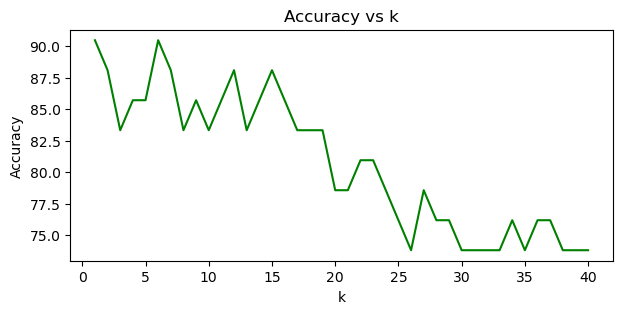

In [69]:
# parameters
kStart = 1;
kEnd = 40;

# initialize k vector that represents number of neighbors from kStart until kEnd
k = range(kStart, kEnd+1);

# calculate accuracy vector for each iteration of K neighbors
accVec = createAccVec(k, DTrain_norm, XTest_norm, YTest_norm);

# plot the accuracy of the KNN vs K neighbors
plotKVec(k , accVec);

<span>Using KNN function with 1 to 40 neighbors, but with 2 new data division between train and data</span>

First Seed:


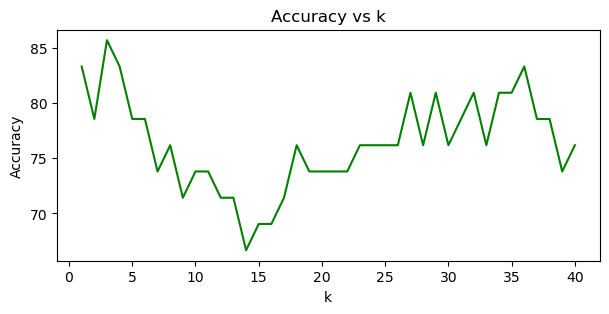

Second Seed:


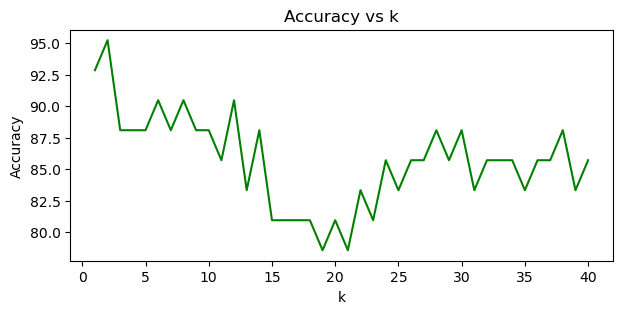

In [70]:
np.random.seed(10)
Data1_norm = np.random.permutation(Data_norm)

# divide the full first dataset into the train and test datasets
[DTrain1_norm, DTest1_norm, XTrain1_norm, YTrain1_norm, XTest1_norm, YTest1_norm] = setTrainTest(Data1_norm, NTrain);

# calculate accuracy vector for each iteration of K neighbors
accVec1 = createAccVec(k, DTrain1_norm, XTest1_norm, YTest1_norm);

# plot the accuracy of the KNN vs K neighbors
print('First Seed:');
plotKVec(k , accVec1);
plt.show();

np.random.seed(20)
Data2_norm = np.random.permutation(Data_norm)

# divide the full second dataset into the train and test datasets
[DTrain2_norm, DTest2_norm, XTrain2_norm, YTrain2_norm, XTest2_norm, YTest2_norm] = setTrainTest(Data2_norm, NTrain);

# calculate accuracy vector for each iteration of K neighbors
accVec2 = createAccVec(k, DTrain2_norm, XTest2_norm, YTest2_norm);

# plot the accuracy of the KNN vs K neighbors
print('Second Seed:');
plotKVec(k , accVec2);
plt.show();

<span>Using KNN function with 1 to 40 neighbors, but with a vector of seeds, display the most frequent 'best K'</span>

In [71]:
kVec = [];
for seedVal in [12, 47, 85, 797, 547, 548, 218, 564, 2147, 5216, 213, 54, 874]:
    np.random.seed(seedVal)
    
    Data3_norm = np.random.permutation(Data_norm)
    
    # divide the full third dataset into the train and test datasets
    [DTrain3_norm, DTest3_norm, XTrain3_norm, YTrain3_norm, XTest3_norm, YTest3_norm] = setTrainTest(Data3_norm, NTrain);
    
    # calculate accuracy vector for each iteration of K neighbors
    accVec3 = createAccVec(k, DTrain3_norm, XTest3_norm, YTest3_norm);

    kVec.append(np.argmax(accVec3)+k[0])

print('best k in each iteration: ');
print(kVec);

kCounts = np.bincount(kVec)    

print('bin count of best k vector: ' + str(kCounts))
print('k that gave the best results in this run is: ' + str(np.argmax(kCounts)));

best k in each iteration: 
[1, 1, 1, 1, 1, 2, 4, 1, 2, 4, 3, 6, 10]
bin count of best k vector: [0 6 2 1 2 0 1 0 0 0 1]
k that gave the best results in this run is: 1


הסבר אימון מסווג KNN עם מידע מנורמל: <br>
לאחר נרמול המידע, לא היה הבדל בתהליך אימון המסווג, כי לא היה צריך לשנות אף פרמטר. <br>
אך ראינו כי ה K המיטבי הוא כעת 1.

In [72]:
print('K=3 Comparision for Non-Normalized vs Normalized results:')
data = {'' :['Non-Normalized', 'Normalized'],
        'Train Accuracy': [accuracy(yPredTrain, YTrain), accuracy(yPredTrain_norm, YTrain_norm)],
        'Test Accuracy': [accuracy(yPredTest, YTest), accuracy(yPredTest_norm, YTest_norm)],
      }

df = pd.DataFrame(data)
df = df.style.hide_index()

display(df)

K=3 Comparision for Non-Normalized vs Normalized results:


,Train Accuracy,Test Accuracy
Non-Normalized,89.156627,85.714286
Normalized,93.975904,83.333333


עבור K=3 אנו רואים כי לאחר נרמול המידע, דיוק המסווג עלה בסדרת המבחן, אך ירד בסדרת האימון.

<span><u>Redo of Part B with normalized dataset:</u><span>

<span>Initialize w0 with zeros as data is now normalized<span>

In [73]:
w_init = np.zeros(XTrain.shape[1]+1);

<span>Redefine the parameters as the dataset has been normalized, which means altered parameters are needed<span>

<span>Run the training with the normalized train dataset<span>

In [74]:
T = 600
gdm = np.array([0, 1, T/3, 2*T/3, T-1, T]).astype(int);
th = 0.5;
#alpha = 0.001;
alpha = 0.000125

w_t = runExperiment(XTrain_norm, YTrain_norm, T, alpha, w_init);

<span>Evaluate the classifier over its iterations with the normalized train dataset<span>

for iteration #0:
the confusion matrix is:
[[80.  0.]
 [86.  0.]]
the accuracy of this classifier is:
48.19277108433735%

for iteration #1:
the confusion matrix is:
[[62. 18.]
 [27. 59.]]
the accuracy of this classifier is:
72.89156626506023%

for iteration #200:
the confusion matrix is:
[[69. 11.]
 [15. 71.]]
the accuracy of this classifier is:
84.33734939759037%

for iteration #400:
the confusion matrix is:
[[70. 10.]
 [12. 74.]]
the accuracy of this classifier is:
86.74698795180723%

for iteration #599:
the confusion matrix is:
[[72.  8.]
 [11. 75.]]
the accuracy of this classifier is:
88.55421686746988%

for iteration #600:
the confusion matrix is:
[[72.  8.]
 [11. 75.]]
the accuracy of this classifier is:
88.55421686746988%



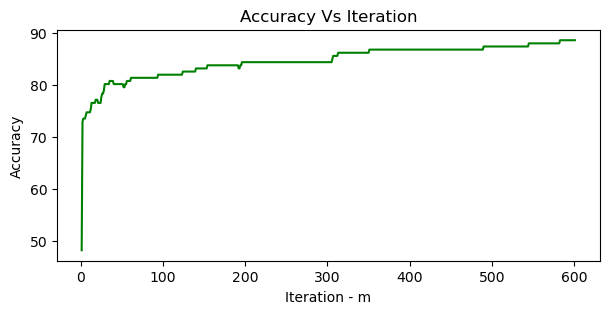

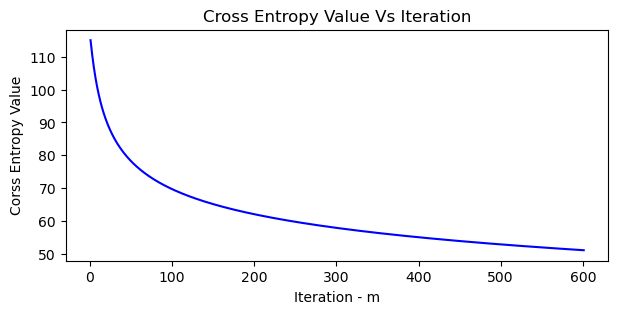

In [75]:
[confMatVecTrain_norm,accuracyVecTrain_norm,ceVecTrain_norm,classifiedTrain_norm] = evalClassifierOverIteration(XTrain_norm, YTrain_norm, w_t, th, T, gdm);

<span>Evaluate the classifier over its iterations with the normalized test dataset<span>

for iteration #0:
the confusion matrix is:
[[17.  0.]
 [25.  0.]]
the accuracy of this classifier is:
40.476190476190474%

for iteration #1:
the confusion matrix is:
[[13.  4.]
 [11. 14.]]
the accuracy of this classifier is:
64.28571428571429%

for iteration #200:
the confusion matrix is:
[[16.  1.]
 [ 7. 18.]]
the accuracy of this classifier is:
80.95238095238095%

for iteration #400:
the confusion matrix is:
[[16.  1.]
 [ 6. 19.]]
the accuracy of this classifier is:
83.33333333333334%

for iteration #599:
the confusion matrix is:
[[16.  1.]
 [ 7. 18.]]
the accuracy of this classifier is:
80.95238095238095%

for iteration #600:
the confusion matrix is:
[[16.  1.]
 [ 7. 18.]]
the accuracy of this classifier is:
80.95238095238095%



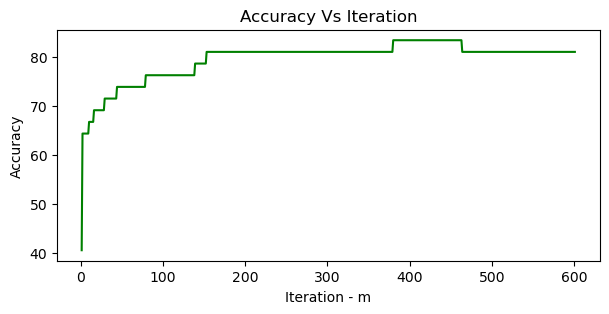

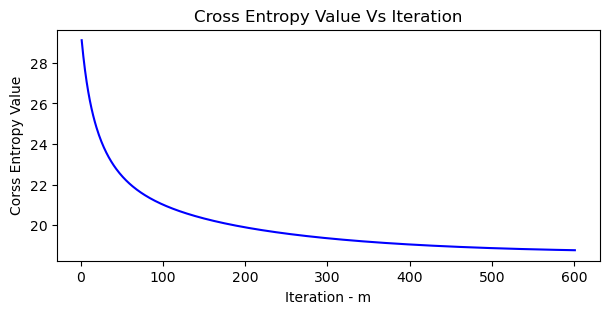

In [76]:
[confMatVecTest_norm,accuracyVecTest_norm,ceVecTest_norm,classifiedTest_norm] = evalClassifierOverIteration(XTest_norm, YTest_norm, w_t, th, T, gdm);

In [77]:
print('Comparision for Non-Normalized vs Normalized results:')
data = {'' :['Non-Normalized', 'Normalized'],
        'Train Accuracy': [accuracyVecTrain[-1], accuracyVecTrain_norm[-1]],
        'Test Accuracy': [accuracyVecTest[-1], accuracyVecTest_norm[-1]], 
      } # non normalized is wrong, recalculate the correct one

df = pd.DataFrame(data)
df = df.style.hide_index()

display(df)

Comparision for Non-Normalized vs Normalized results:


,Train Accuracy,Test Accuracy
Non-Normalized,81.325301,78.571429
Normalized,88.554217,80.952381


אנו רואים כי לאחר נרמול המידע, דיוק המסווג עלה בסדרת האימון וגם בסדרת המבחן.

נרמול המידע הביא לכך שממוצע הדוגמאות לכל מאפיין הוא 0 ושונות הדוגמאות לכל מאפיין היא 1.

מה שגרם לכך שהדוגמאות כעת נמצאות על אותה סקלה ביחס לכל מאפיין, כלומר כעת בכל דוגמה הערך שיש במאפיין מייצג לא רק מספר, אלא גם יחס לשאר הדוגמאות.

ומכיוון שהשונות היא 1, נגרום לכך שגורם התיקון יהיה באותו תחום עבודה של כל המאפיינים,

כלומר לא יהיה מצב שבו למאפיין א' היה עדיף גורם תיקון גדול, ולמאפיין ב' היה עדיף גורם תיקון קטן.

כעת, לאחר הנרמול, אותו גורם תיקון יתאים לכל המאפיינים.